<a href="https://colab.research.google.com/github/ManiDhakal/biofx_python/blob/main/Copy_of_Simulation_of_Version_4(Latex).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.2 MB/s eta 0:00:00


# This co-infection code is edited and is corrected to include proper reinfections..Solving the model:

## This has data changed (Here i am trying to plot cumulative graphs)

# This is co-infection model:
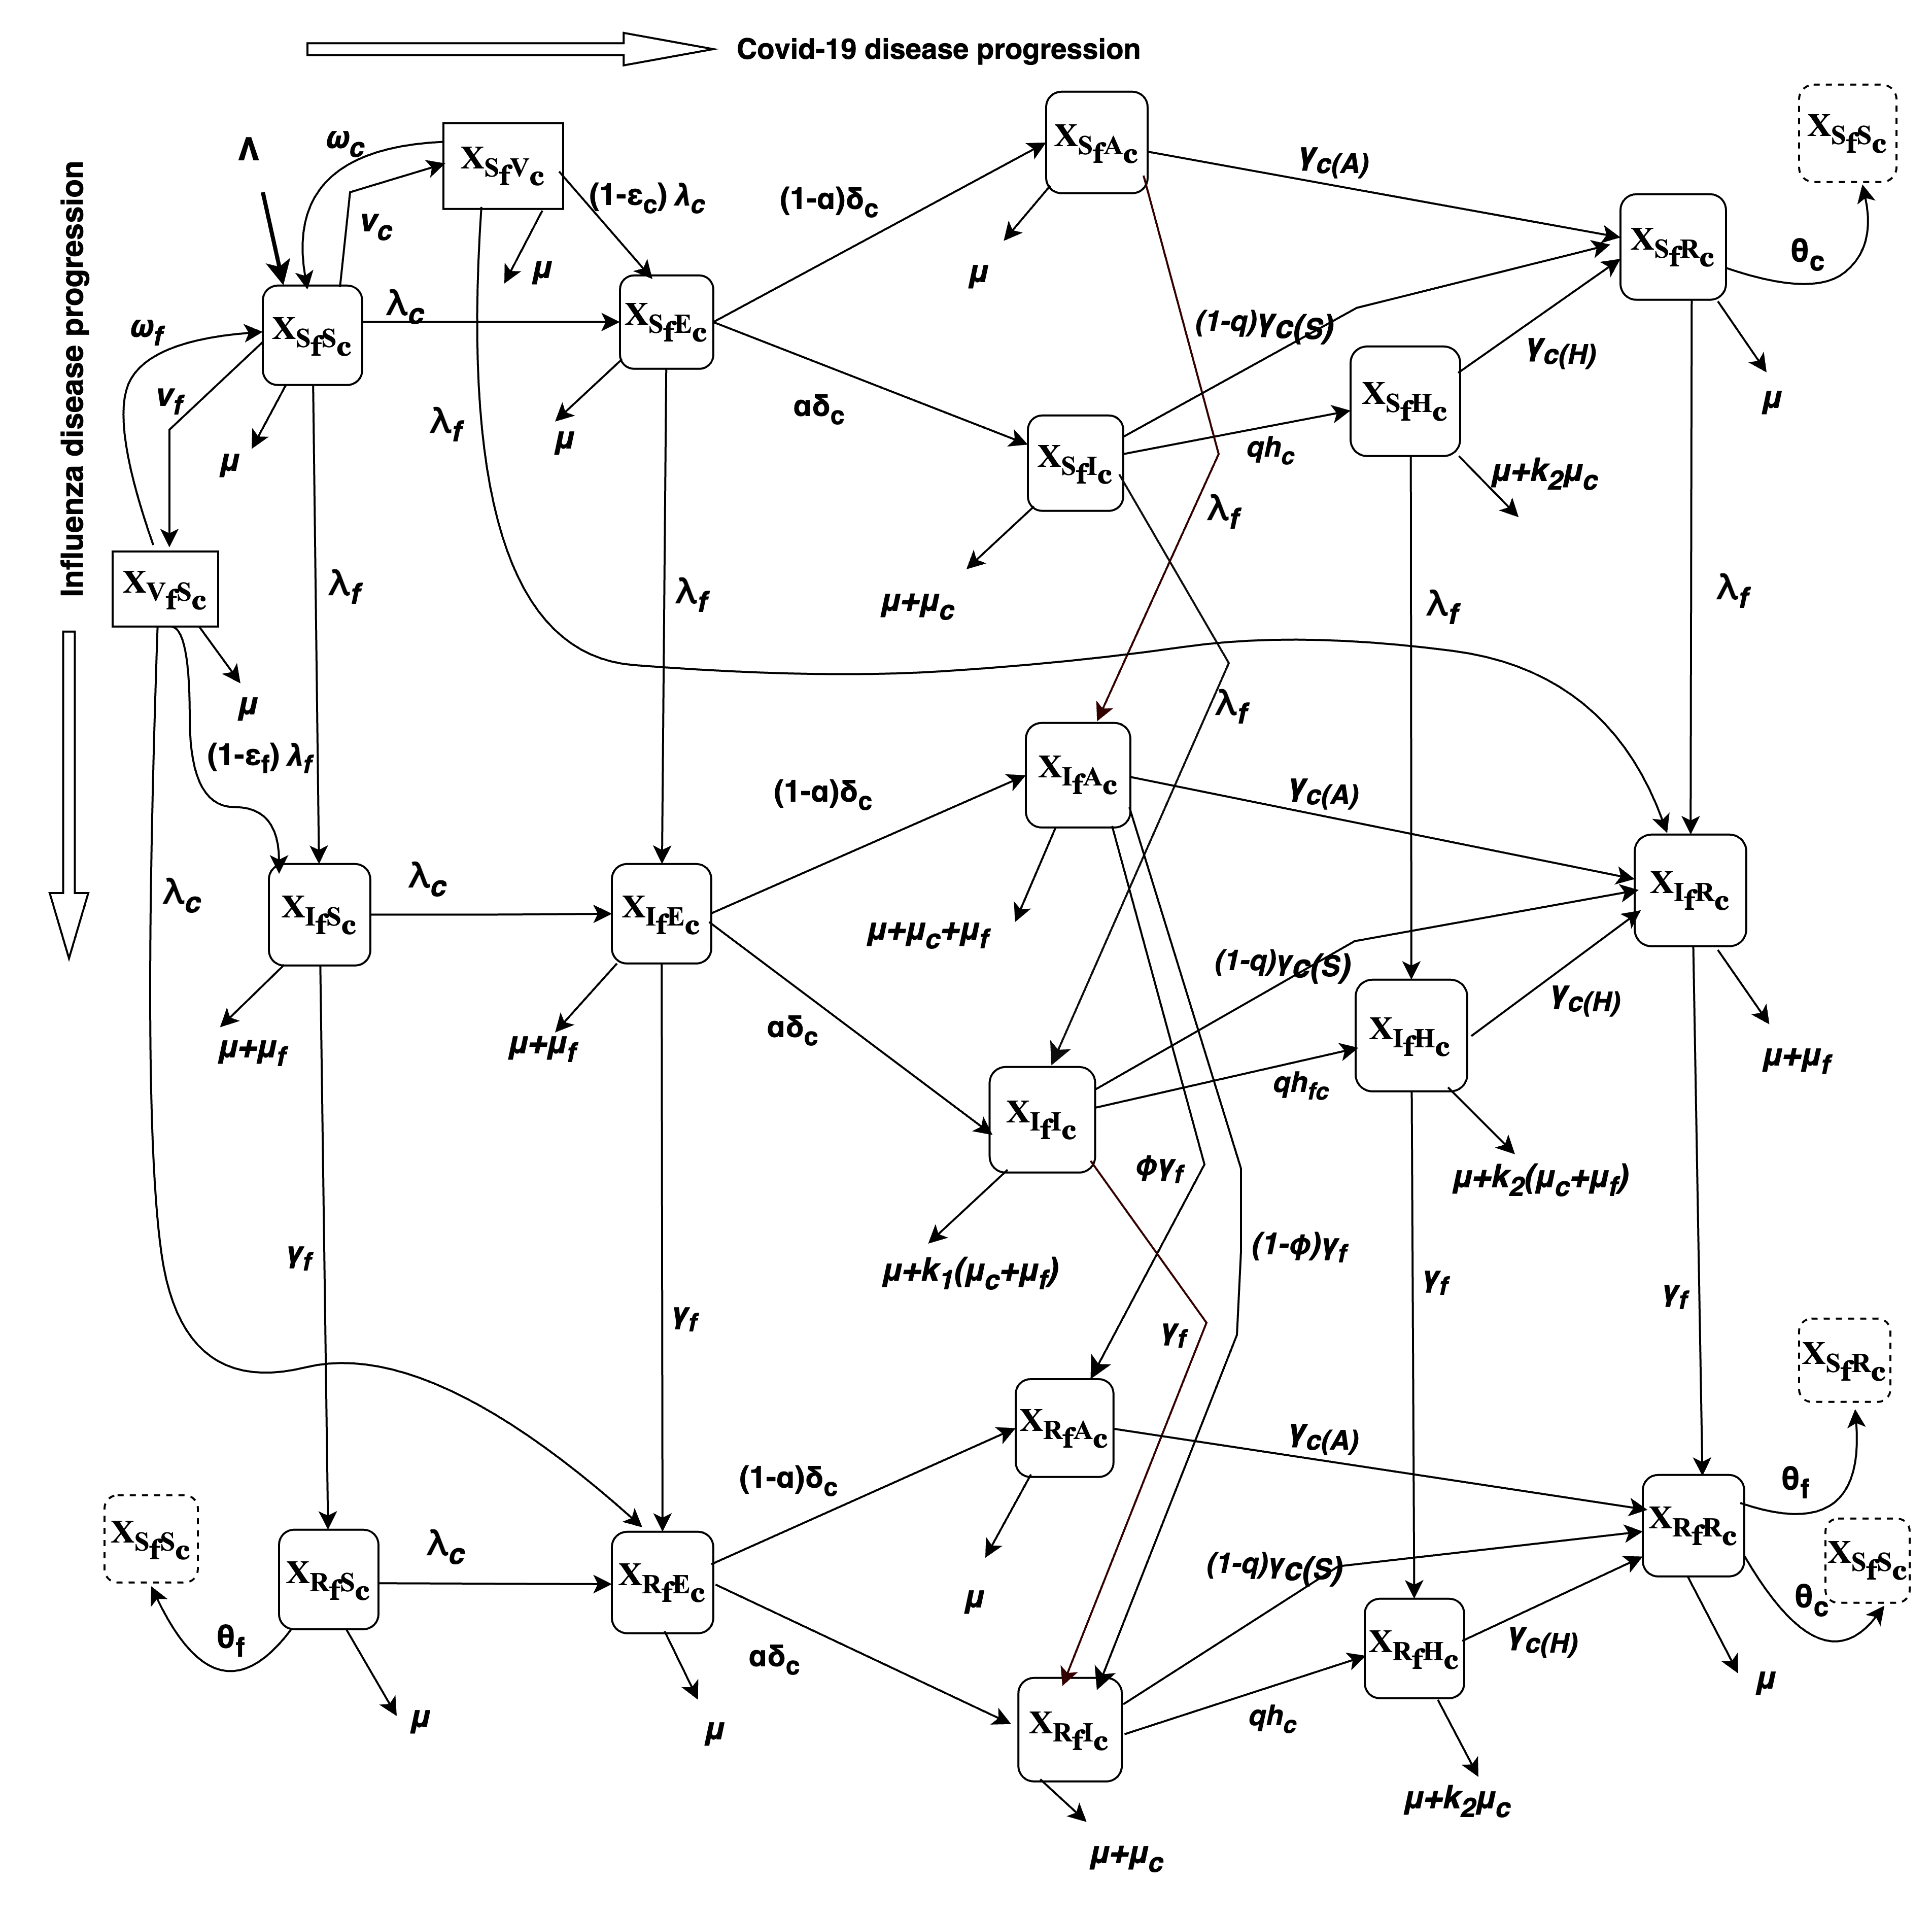

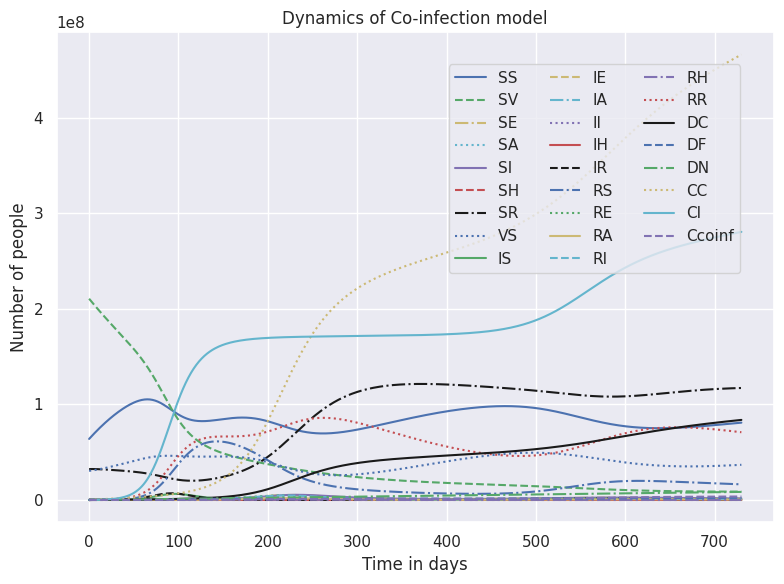

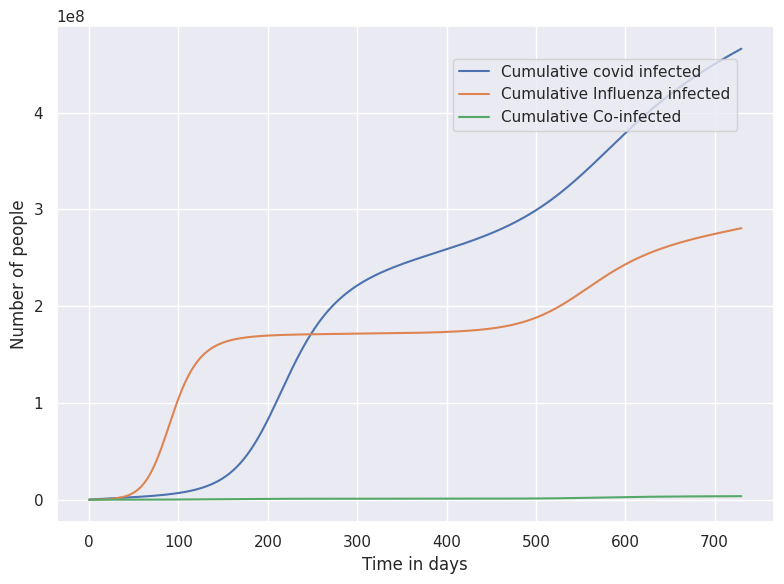

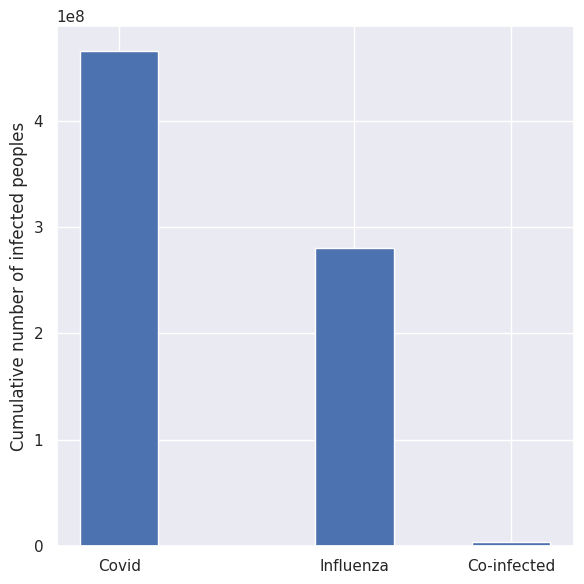

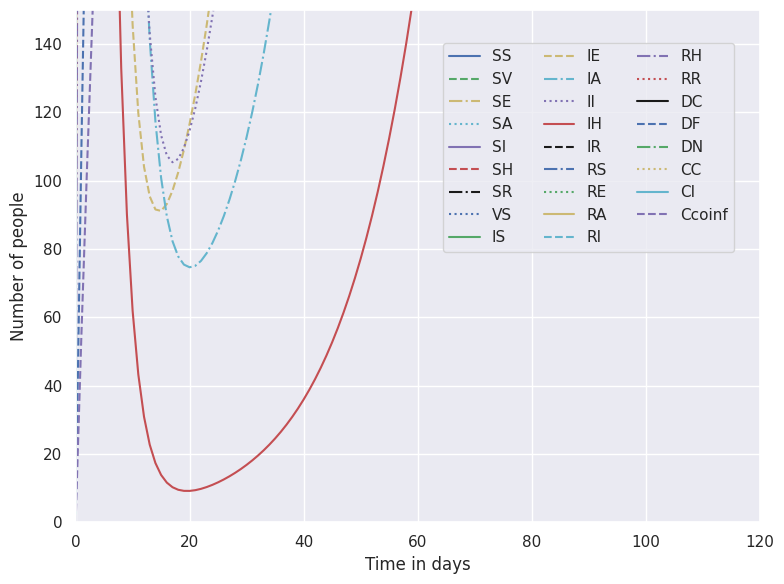

In [2]:
# This is doing excellent job ....
# This co-infection code is edited. Here we vaccinate only the susceptibles.

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def model1(t, y, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
           etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N):
    ss, sv, se, sa, si, sh, sr, vs, ks, ie, ia, ii, ih, ir, rs, re, ra, ri, rh, rr, DFC, DC, DN, CC,CI, Ccoinf = y
    # if t < 365:
    #   thetac = 0
    #   thetaf = 0
    # #     vc = 0
    # #     vf = 0
    # #     wc = 0
    # #     wf = 0
    # #     ec = 0
    # #     ef = 0
    # #     thetac=0
    IC= (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh)
    IF =(ks + ie + ia + ii + etaH * ih + ir)
    Lambda = mu * (ss+ sv+ se+ sa+ si+ sh +sr+ vs+ ks+ ie+ ia+ ii+ ih+ ir+ rs+ re+ ra+ ri+ rh+ rr) + muc*(si + kappa2* sh +ia + kappa1*ii + kappa2*ih +ri + kappa2*rh) + muf*(ks + ie + ia + kappa1* ii+ kappa2* ih + ir)
    dSS_dt = Lambda + thetac * (sr+rr) + thetaf * rs +wc *sv + wf* vs - (1-u1)*betaf * IF * ss / N - (1-u1)*betac * IC * ss / N - (mu+u2* vc+u3* vf) * ss
    dSV_dt = u2* vc *ss  - (wc + (1 - u4*ec) * (1-u1)*betac * IC / N + mu + (1-u1)*betaf * IF / N) * sv
    dSE_dt = (1 - u4*ec) * (1-u1)*betac * IC * sv / N + (1-u1)*betac * IC * ss / N  - deltac * se - (1-u1)*betaf * IF * se / N - mu * se
    dSA_dt = (1 - alpha) * deltac * se - gammacA * sa - (1-u1)*betaf * IF * sa / N - mu * sa
    dSI_dt = alpha * deltac * se - (1-u1)*betaf * IF * si / N - (q*hc + (1-q)* u5* gammacI + mu + muc) * si
    dSH_dt = q*hc * si - (1-u1)*betaf * IF * sh / N - (mu + kappa2 * muc + u5* gammacH) * sh
    dSR_dt = gammacA * sa + thetaf * rr + (1-q)* u5* gammacI * si + u5* gammacH* sh - (1-u1)*betaf * IF * sr / N - thetac * sr - mu * sr
    dVS_dt = u3* vf* ss - (wf + (1 - u4*ef) * (1-u1)*betaf * IF / N + mu + (1-u1)*betac * IC / N) * vs
    dKS_dt = (1 - u4*ef) * (1-u1)*betaf * IF * vs / N + (1-u1)*betaf * IF * ss / N - (1-u1)*betac * IC * ks / N - u5*gammaf * ks - mu * ks -muf *ks
    dIE_dt = (1-u1)*betac * IC * ks / N + (1-u1)*betaf * IF * se / N - (deltac + u5*gammaf) * ie - mu * ie -muf *ie
    dIA_dt = (1 - alpha) * deltac * ie + (1-u1)*betaf * IF * sa / N - gammacA * ia - u5*gammaf * ia - (mu + muc + muf ) *ia
    dII_dt = alpha * deltac * ie + (1-u1)*betaf * IF * si / N - (q*hfc + (1-q)* u5* gammacI) * ii - u5*gammaf * ii - mu *ii - kappa1*(muc+ muf ) * ii
    dIH_dt = q*hfc * ii + (1-u1)*betaf * IF * sh / N - (u5* gammacH+ u5*gammaf + mu + kappa2 *(muc+ muf)) * ih
    dIR_dt = gammacA * ia + (1-q)* u5* gammacI * ii + u5* gammacH* ih + (1-u1)*betaf * IF * (sr + sv) / N - (u5*gammaf + mu +muf) * ir
    dRS_dt = u5*gammaf * ks - (1-u1)*betac * IC * rs / N - thetaf * rs - mu * rs
    dRE_dt = (1-u1)*betac * IC * (rs + vs) / N + u5*gammaf * ie - deltac * re - mu * re
    dRA_dt = (1 - alpha) * deltac * re + phi * u5*gammaf * ia - gammacA * ra - mu* ra
    dRI_dt = alpha * deltac * re + (1 - phi) * u5*gammaf * ia + u5*gammaf * ii - ((1-q)* u5* gammacI + q*hc + mu + muc) * ri
    dRH_dt = q*hc * ri + u5*gammaf * ih - (u5* gammacH+ mu + kappa2 * muc) * rh
    dRR_dt = gammacA * ra + (1-q)* u5* gammacI *ri + u5* gammacH* rh + u5*gammaf * ir - (thetac + thetaf + mu) * rr
    dDC_dt = muc*(si + kappa2* sh +ia + kappa1*ii + kappa2*ih +ri + kappa2*rh)
    dDF_dt = muf*(ks + ie + ia + kappa1* ii+ kappa2* ih + ir)
    dDN_dt = mu * (ss+ sv+ se+ sa+ si+ sh +sr+ vs+ ks+ ie+ ia+ ii+ ih+ ir+ rs+ re+ ra+ ri+ rh+ rr)
    dCC_dt= (1 - u4*ec) * (1-u1)*betac * IC * sv / N + (1-u1)*betac * IC * ss / N + (1-u1)*betac * IC * ks/N + (1-u1)*betac * IC * (rs + vs) / N
    dCI_dt= (1 - u4*ef) * (1-u1)*betaf * IF * vs / N + (1-u1)*betaf * IF * ss / N + (1-u1)*betaf * IF * se / N + (1-u1)*betaf * IF *( sa +si +sh +sr + sv ) / N
    dCcoinf= (1-u1)*betac * IC * ks / N + (1-u1)*betaf * IF * sa / N + (1-u1)*betaf * IF * si / N + (1-u1)*betaf * IF * sh / N
    return [dSS_dt, dSV_dt, dSE_dt, dSA_dt, dSI_dt, dSH_dt, dSR_dt, dVS_dt, dKS_dt, dIE_dt, dIA_dt, dII_dt, dIH_dt, dIR_dt, dRS_dt, dRE_dt, dRA_dt, dRI_dt, dRH_dt, dRR_dt, dDC_dt, dDF_dt, dDN_dt, dCC_dt, dCI_dt, dCcoinf]

# Parameter values:
N = 338417798  #334805269
# y0 = [208092945, 267844215, 10482, 758346, 35705, 2228, 108065982,
#       160706529, 100000, 5000, 2000, 4000, 1000, 20000,
#       20000, 100, 100, 100, 10, 10,
#       0, 0, 0, 0, 0, 0]
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3030
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1


# Initialize time and initial conditions
t = 0
t_end = 730

y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
# Lists to store the results at each time step
times = []
results = []
cumulative_covid_coinfectionmodel=[]
cumulative_Influenza_coinfectionmodel=[]
cumulative_Coinfection=[]
# Integration loop with a fixed time step of 1 day

sum1 = y0[2:6] + y0[9:13] + y0[15:19]  # Initialize cumulative_covid_coinfectionmodel sum
sum2 = y0[8:14]  # Initialize cumulative_Influenza_coinfectionmodel sum
sum3 = y0[9:13]

while t <= t_end:
    times.append(t)
    results.append(y0)

    sum1 = np.sum(y0[23])
    sum2 = np.sum(y0[24])
    sum3 = np.sum(y0[25])

    cumulative_covid_coinfectionmodel.append(sum1)
    cumulative_Influenza_coinfectionmodel.append(sum2)
    cumulative_Coinfection.append(sum3)

    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]


# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# ax.set_xlim(0, 250) # Remove this two lines if you want complete  diagram
# ax.set_ylim(0,700)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of Co-infection model')
# Adjust legend position and size
legend = ax.legend(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR',
                    'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN','CC','CI', 'Ccoinf'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=3)

plt.tight_layout()

plt.savefig('fig_coinfn_final.png')
# plt.show()
#################

#########################################################
### Plot only the Cumulative covid infected and Influenza
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(times,cumulative_covid_coinfectionmodel, label='Cumulative covid infected')
ax.plot(times,cumulative_Influenza_coinfectionmodel, label='Cumulative Influenza infected')
ax.plot(times,cumulative_Coinfection, label='Cumulative Co-infected')
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=1)
plt.tight_layout()

################### Bar diagram

# Final values of Cumulative COVID and Influenza infections
final_covid = cumulative_covid_coinfectionmodel[-1]
final_influenza = cumulative_Influenza_coinfectionmodel[-1]
final_coinf = cumulative_Coinfection[-1]

# Create a bar diagram for the final values
fig, ax = plt.subplots(figsize=(6, 6))
# Set your desired bar width
bar_width = 0.1

# Custom bar positions
bar_positions = [0.25, 0.55, 0.75]  # Adjust these values to change the bar positions

# Bar heights
bar_heights = [final_covid, final_influenza, final_coinf]

# Create bars
ax.bar(bar_positions, bar_heights, width=bar_width)

# Set custom tick positions and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Covid', 'Influenza', 'Co-infected'])

ax.set_ylabel('Cumulative number of infected peoples')

plt.tight_layout()
plt.show()

############################### ZOOOOOMMMMMMM
# The following code is to zoom a portion of graph

fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-','--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# Set x-axis limits to zoom in from 0 to 100 days
ax.set_xlim(0, 120)
ax.set_ylim(0,150)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN', 'CC', 'CI', 'Ccoinf'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=3)
# You can adjust bbox_to_anchor to control the legend position relative to the plot

plt.tight_layout()

# plt.savefig('fig.png')
# plt.show()


In [3]:
# Printing the numerical result.
from tabulate import tabulate
v_c= 0.007
ec= 0.95
wc =1/180
v_f= 0.005
ef =0.632
wf =1/180
# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    times.append(t)
    results.append(y0)
    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Headers for the table
headers = ["Time (days)", "SS", "SV", "SE", "SA", "SI", "SH", "SR", "VS", "IS", "IE", "IA", "II", "IH", "IR", "RS", "RE", "RA", "RI", "RH", "RR", "DC", "DF", "DN", "Cum_cov", "Cum_Inf", "Total"]

# Combine time and results into a list of lists, and calculate the row sums
data = []
for t, result in zip(times, np.round(results,3)):
    row_sum = np.sum(result[0:20])
    data.append([t] + list(result) + [row_sum])

# Print the table
table = tabulate(data, headers, tablefmt="pretty")
print(table)


+-----+---------------+---------------+------------+------------+------------+-----------+--------------+--------------+-------------+-----------+----------+-----------+----------+-------------+--------------+------------+------------+------------+-----------+--------------+-------------+-------------+-------------+--------------+---------------+------------+--------------------+
|     |  Time (days)  |      SS       |     SV     |     SE     |     SA     |    SI     |      SH      |      SR      |     VS      |    IS     |    IE    |    IA     |    II    |     IH      |      IR      |     RS     |     RE     |     RA     |    RI     |      RH      |     RR      |     DC      |     DF      |      DN      |    Cum_cov    |  Cum_Inf   |       Total        |
+-----+---------------+---------------+------------+------------+------------+-----------+--------------+--------------+-------------+-----------+----------+-----------+----------+-------------+--------------+------------+------------

# Plotting different graphs of cumulative infections for different values of parameters

## Plotting different graphs of cumulative infections for different values of Betaf

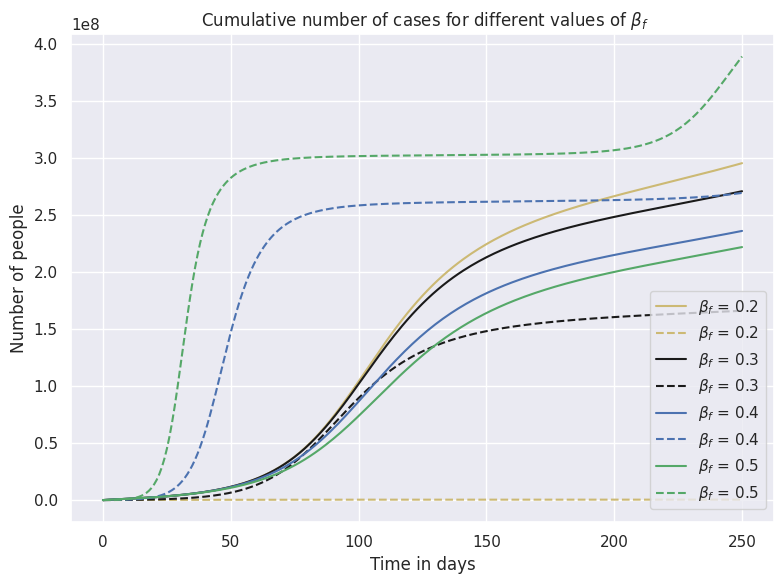

In [4]:
# Plotting different graphs of cumulative infections for different values of Betaf
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1


# Initialize time and initial conditions
t = 0
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over betaf values
# betaf_values = [0.10, 0.2,0.3, 0.4]
betaf_values = [0.2, 0.3, 0.4, 0.5]
for betaf in betaf_values:
    # Reset time and initial conditions for each betaf
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current betaf
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, betaf in enumerate(betaf_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\\beta_f$ = {betaf}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\\beta_f$ = {betaf}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\\beta_f$')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_betaf_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of Betac

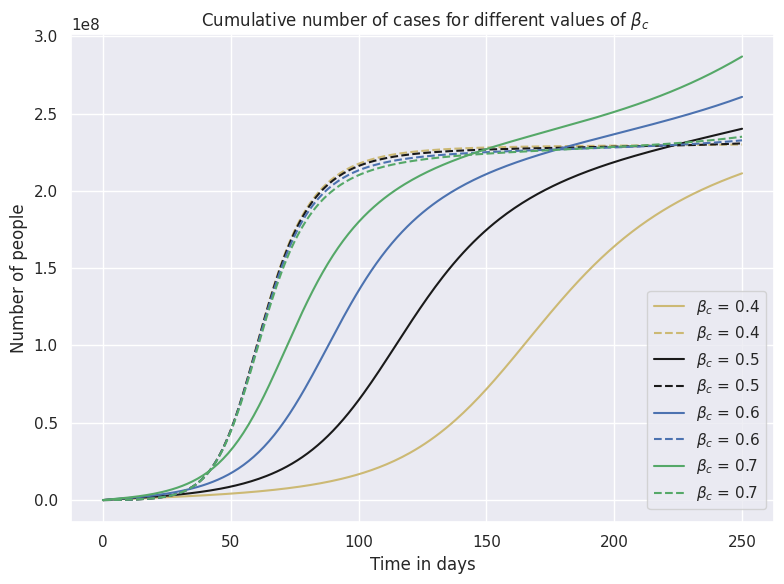

In [5]:
# Plotting different graphs of cumulative infections for different values of Betac
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end = 250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over betaf values
betac_values = [0.4, 0.5, 0.6, 0.7]
for beta_c in betac_values:
    # Reset time and initial conditions for each betaf
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( beta_c, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current betac
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, beta in enumerate(betac_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\\beta_c$ = {beta}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\\beta_c$ = {beta}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\\beta_c$')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_betac_finalmodel.png')

# Display the figure
plt.show()



## Plotting different graphs of cumulative infections for different values of etaA

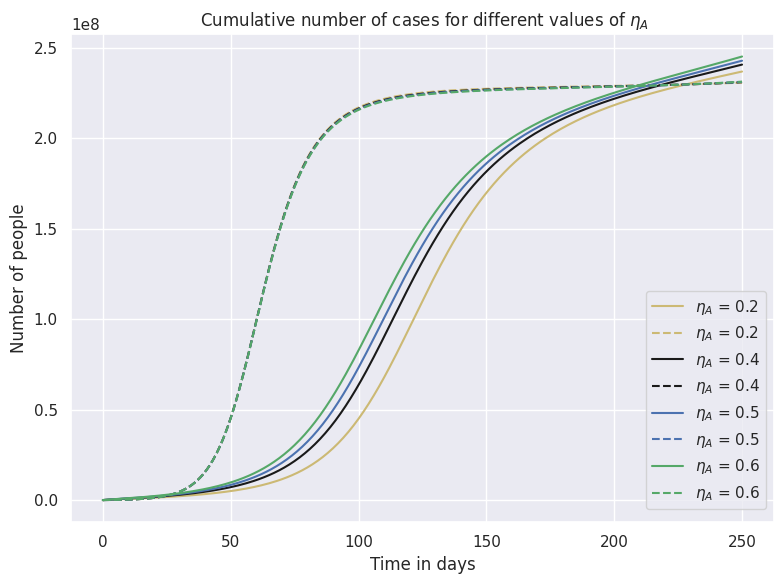

In [6]:
# Plotting different graphs of cumulative infections for different values of etaA
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over etaA values
etaA_values = [0.2, 0.4, 0.5, 0.6]
for etaA in etaA_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current etaA
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, etaA in enumerate(etaA_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\eta_A$ = {etaA}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\eta_A$ = {etaA}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\eta_A$')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_etaA_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of etaH

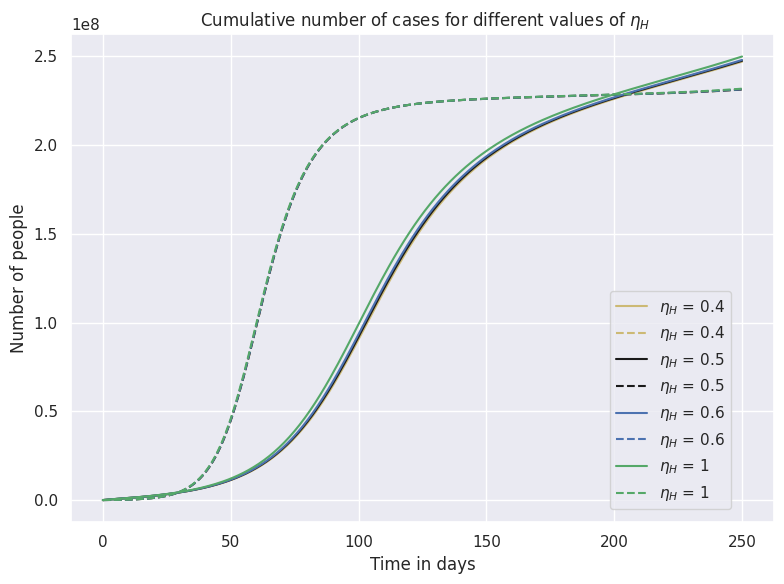

In [7]:
# Plotting different graphs of cumulative infections for different values of etaH
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over etaH values
etaH_values = [0.4, 0.5, 0.6,1]
for etaH in etaH_values:
    # Reset time and initial conditions for each etaH
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current etaH
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, etaH in enumerate(etaH_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\eta_H$ = {etaH}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\eta_H$ = {etaH}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\eta_H$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_etaH_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of gammaf

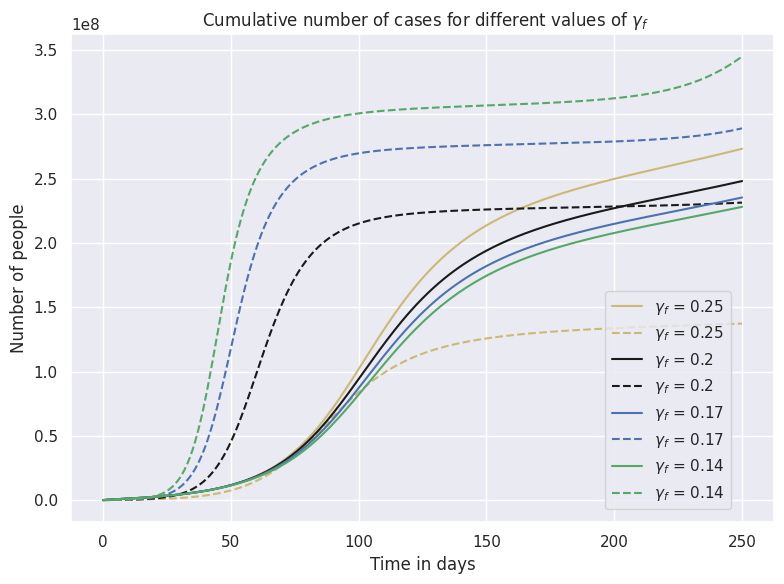

In [8]:
# Plotting different graphs of cumulative infections for different values of gammaf
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
gammaf_values = [ 1/4, 1/5, 1/6, 1/7]
for gammaf in gammaf_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammaf
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammaf in enumerate(gammaf_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\gamma_f$ = {round(gammaf,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\gamma_f$ = {round(gammaf,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\gamma_f$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_gammaf_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of gammacA

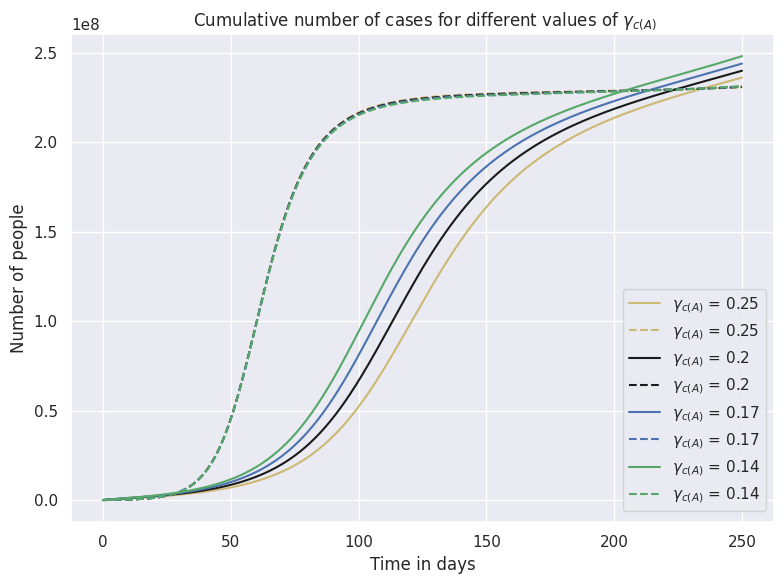

In [9]:
# Plotting different graphs of cumulative infections for different values of gammacA
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
gammacA_values = [ 1/4, 1/5, 1/6, 1/7]
for gammacA in gammacA_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammacA
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammacA in enumerate(gammacA_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\gamma_{{c(A)}}$ = {round(gammacA,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\gamma_{{c(A)}}$ = {round(gammacA,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\gamma_{c(A)}$')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_gammacA_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of gammacI

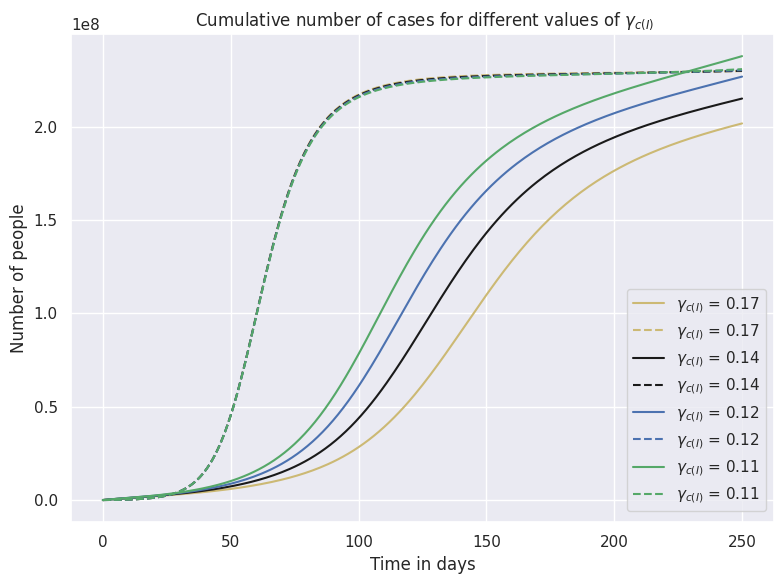

In [10]:
# Plotting different graphs of cumulative infections for different values of gammacI
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
gammacI_values = [1/6, 1/7,1/8, 1/9]
for gammacI in gammacI_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammacI
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammacI in enumerate(gammacI_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\gamma_{{c(I)}}$ = {round(gammacI,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\gamma_{{c(I)}}$ = {round(gammacI,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\gamma_{c(I)}$')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_gammacI_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of gammacH

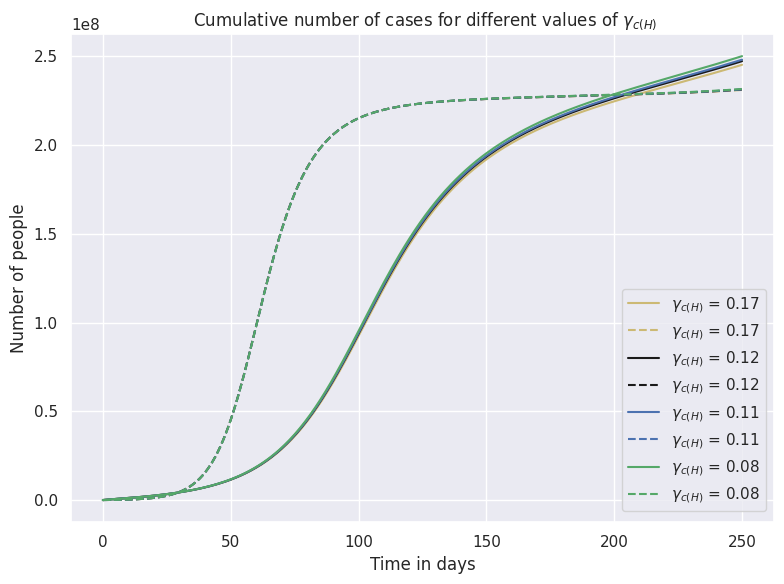

In [11]:
# Plotting different graphs of cumulative infections for different values of gammacH
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammacH values
gammacH_values = [1/6, 1/8, 1/9, 1/12]
for gammacH in gammacH_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammacH
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammacH in enumerate(gammacH_values):
    ax.plot(times, sum_compartments1[i, :], label=f'$\gamma_{{c(H)}}$ = {round(gammacH,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'$\gamma_{{c(H)}}$ = {round(gammacH,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\gamma_{c(H)}$')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_gammacH_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of alpha

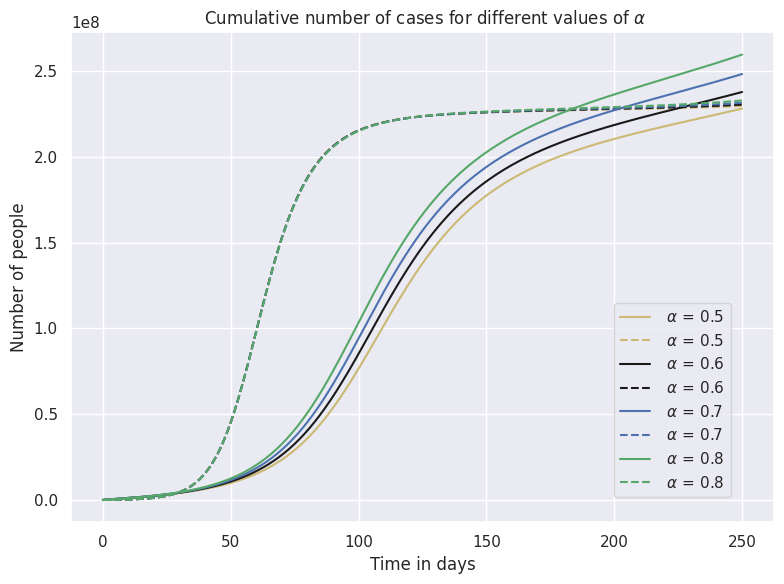

In [12]:
# Plotting different graphs of cumulative infections for different values of alpha
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions

t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over alpha values
alpha_values = [0.5, 0.6, 0.7, 0.8]
for alpha in alpha_values:
    # Reset time and initial conditions for each alpha
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current alpha
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, alpha in enumerate(alpha_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $\\alpha$ = {alpha}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $\\alpha$ = {alpha}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $\\alpha$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_alpha_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of cumulative infections for different values of y0

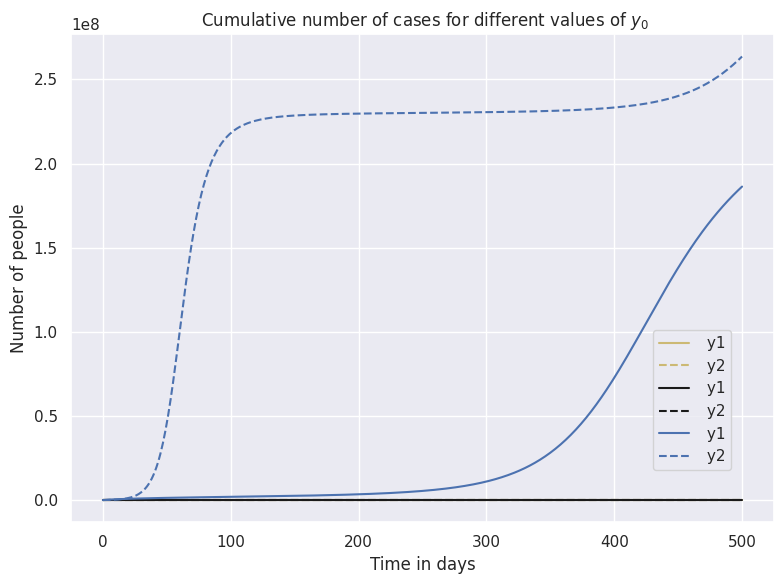

In [13]:
# Plotting different graphs of cumulative infections for different values of y0
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.25402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 500
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
y0_values = [[970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0],[997, 0, 0, 0, 1, 0, 0,
          0, 1, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0],[63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]]
for y0 in y0_values:
    # Reset time and initial conditions for each u1
    t = 0
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammaf
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':','o']
colors = ['y', 'k','b']
for i, y0 in enumerate(y0_values):
    ax.plot(times, sum_compartments1[i, :], label=f' y1', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' y2', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $y_0$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_y0_finalmodel.png')

# Display the figure
plt.show()


In [14]:
print(np.sum(y0))

338417798


In [15]:
del y0_values

# One fold optimization

## Plotting different graphs of cumulative infections for different values of u_1



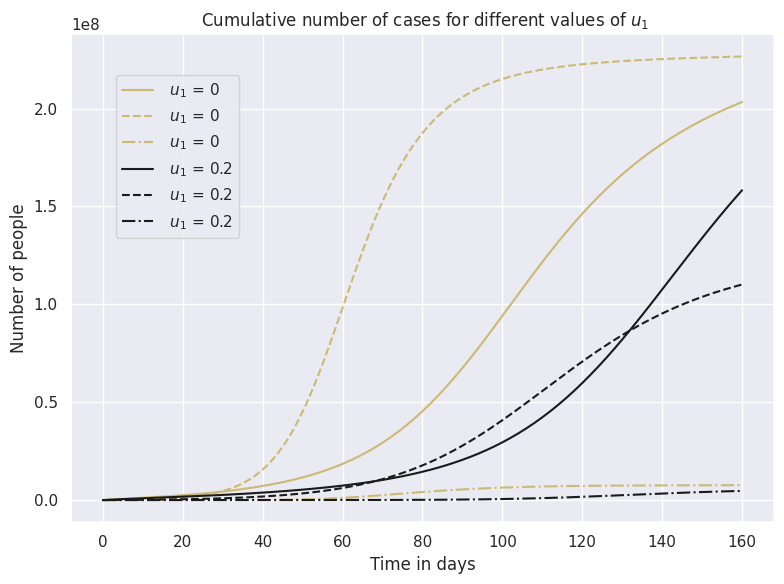

In [16]:
# @title
# Plotting different graphs of cumulative infections for different values of u_1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end = 160
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR
sum_compartments3 = []  # Sum of IE, IA, II, IH

# Loop over u1 values
u1_values = [0, 0.2]
for u1 in u1_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []
    current_sum3 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        sum3 = y0[25]
        # sum1 = np.sum(y0[23]) cumulatives
        # sum2 =np.sum(y0[24])
        current_sum1.append(sum1)
        current_sum2.append(sum2)
        current_sum3.append(sum3)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u1
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))
    sum_compartments3.append(np.array(current_sum3))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)
sum_compartments3 = np.array(sum_compartments3)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u1 in enumerate(u1_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $u_1$ = {u1}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $u_1$ = {u1}', linestyle='--', color=colors[i])
    ax.plot(times, sum_compartments3[i, :], label=f' $u_1$ = {u1}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_1$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.25 , 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u1_finalmodel.png')

# Display the figure
plt.show()
################### Using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u1 in enumerate(u1_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$u_1 = {u1}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$u_1 = {u1}$', line=dict(color=colors[i], dash=line_styles[1]))
    trace3 = go.Scatter(x=times, y=sum_compartments3[i], mode='lines', name=f'$u_1 = {u1}$', line=dict(color=colors[i], dash=line_styles[2]))
    traces.extend([trace1, trace2, trace3])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } u_1$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.1, y=0.75),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cumu_both_u1.png")
# Show figure
fig.show()



## Plotting different graphs of co-infection dynamics for different values of u_1

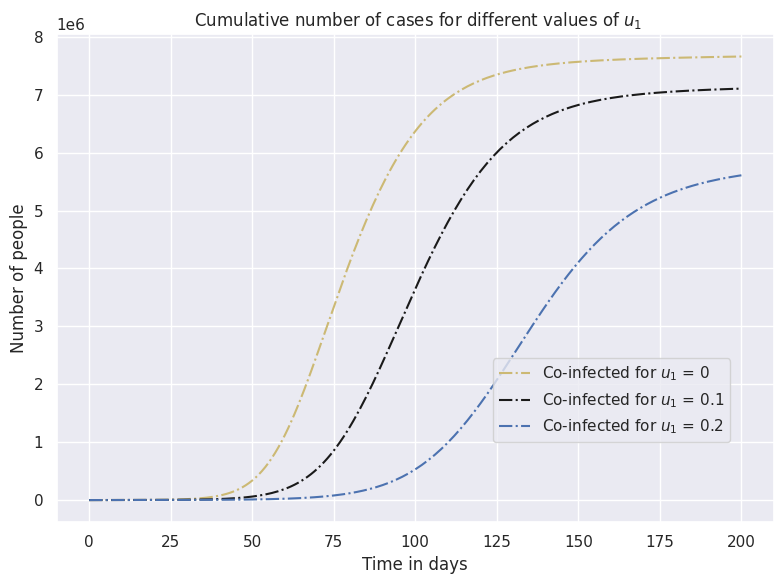

In [17]:
# Plotting different graphs of co-infection dynamics for different values of u_1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end = 200
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments3 = []  # Sum of IE, IA, II, IH for co-infections

# Loop over u1 values
u1_values = [0, 0.10, 0.2]
for u1 in u1_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum3 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum3 = y0[25]
        current_sum3.append(sum3)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u1
    results.append(np.array(current_results))
    sum_compartments3.append(np.array(current_sum3))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments3 = np.array(sum_compartments3)

# Plot the results using pyplot
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u1 in enumerate(u1_values):
    ax.plot(times, sum_compartments3[i, :], label=f'Co-infected for $u_1$ = {u1}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_1$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u1_Coinfected_finalmodel.png')

# Display the figure
plt.show()
#############################
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u1 in enumerate(u1_values):
    trace3 = go.Scatter(x=times, y=sum_compartments3[i], mode='lines', name=f'$u_1 = {u1}$', line=dict(color=colors[i], dash=line_styles[2]))
    traces.extend([trace3])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } u_1$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.1, y=0.75, font=dict(size=30)),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_u1_Coinfected.png")
# Show figure
fig.show()


## Heatmap

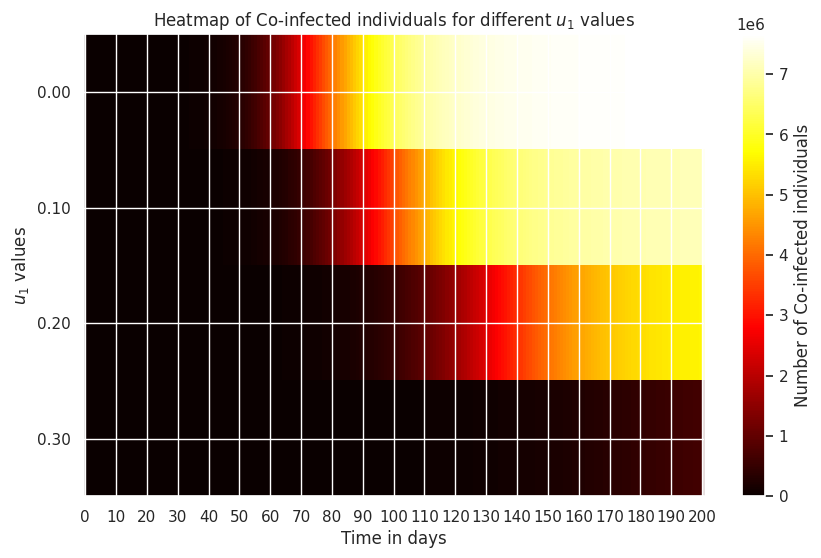

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  # 334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1 / 5
gammacA = 1 / 7
gammacI = 1 / 10
gammacH = 1 / 9
hc = 1 / 4
hfc = 1 / 3
betaf = 0.3530
gammaf = 1 / 5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q = 0.0624

# Death rates:
mu = 1 / (80 * 365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1 / 180
ec = 0.95

vf = 0.005
wf = 1 / 180
ef = 0.632

# Parameters for time dependent control measures:
u1_values = [0, 0.10, 0.2, 0.3]
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end = 200
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments3 = []  # Sum of IE, IA, II, IH for co-infections

# Loop over u1 values
for u1 in u1_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum3 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum3 =  y0[25]
        current_sum3.append(sum3)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf,
                                                       phi, thetac, thetaf, mu, muc, muf,
                                                       etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec,
                                                       ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u1
    results.append(np.array(current_results))
    sum_compartments3.append(np.array(current_sum3))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments3 = np.array(sum_compartments3)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(sum_compartments3, aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar(label='Number of Co-infected individuals')
plt.xticks(np.arange(len(times))[::10], np.arange(len(times))[::10])
plt.yticks(np.arange(len(u1_values)), ['{:.2f}'.format(val) for val in u1_values])
plt.xlabel('Time in days')
plt.ylabel('$u_1$ values')
plt.title('Heatmap of Co-infected individuals for different $u_1$ values')
plt.show()




>## Plotting different graphs of cumulative infections for different values of u_2 (vaccination to COVID-19)



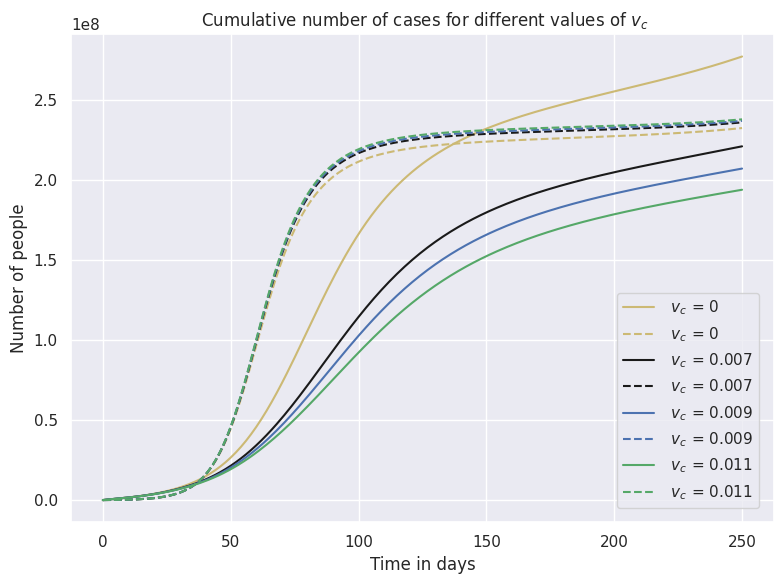

In [19]:
# Plotting different graphs of cumulative infections for different values of u_2 (vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.80

vf = 0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u2_values = [0, 0.007, 0.009, 0.011] #[0, 0.007, 0.0077, 0.0084]
for u2 in u2_values:
    # Reset time and initial conditions for each u2
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u2
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $v_c$ = {u2}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $v_c$ = {u2}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $v_c$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.99 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_vc_finalmodel.png')

# Display the figure
plt.show()

########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u2 in enumerate(u2_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$v_c = {u2}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_c = {u2}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace1, trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_c$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80, font=dict(size=14)),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_Vc_Coinfected.png")
# Show figure
fig.show()



## Plotting different graphs of total co-infected for different values of u_2 (vaccination to COVID-19)

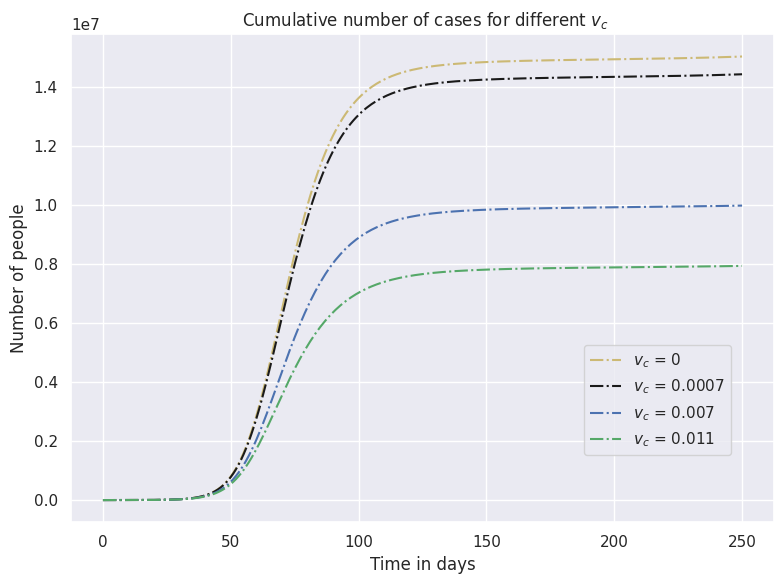

In [20]:
# Plotting different graphs of total co-infected for different values of u_2 (vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.80

vf = 0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments2 = []  # Sum of IE, IA, II, IH

# Loop over u2 values
u2_values = [0, 0.0007, 0.007, 0.011] #[0, 0.007, 0.0077, 0.0084]
for u2 in u2_values:
    # Reset time and initial conditions for each u2
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum2 = y0[25]
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u2
    results.append(np.array(current_results))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments2[i, :], label=f'$v_c$ = {u2}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different $v_c$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_coinf_dynamics_Vc.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u2 in enumerate(u2_values):
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_c = {u2}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_c$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_coinf_Vc.png")
# Show figure
fig.show()






> ## Plotting different graphs of cumulative infections for different values of u_3 (Vaccination to Influenza)



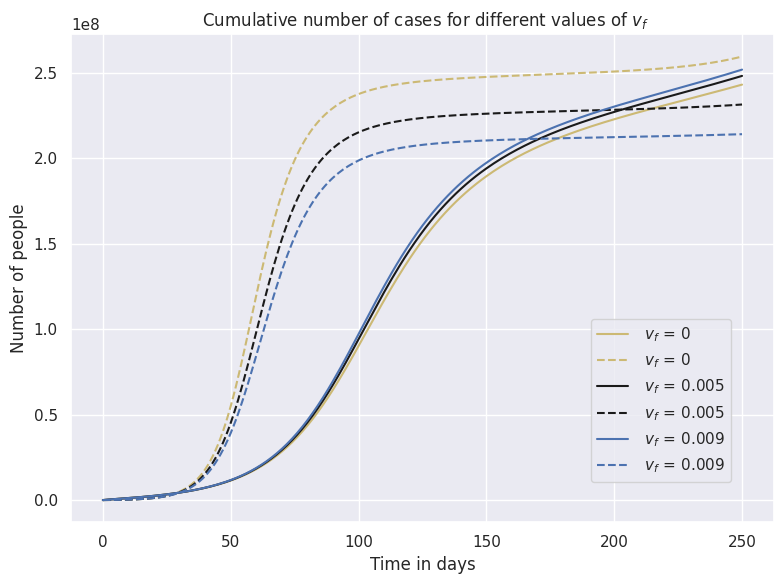

In [21]:
# Plotting different graphs of cumulative infections for different values of u_3 (Vaccination to Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vf = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u3_values = [0, 0.005, 0.009]
for u3 in u3_values:
    # Reset time and initial conditions for each u_3 values (Vaccination to Influenza)
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u3
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u3 in enumerate(u3_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $v_f$ = {u3}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $v_f$ = {u3}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $v_f$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_vf_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u3 in enumerate(u3_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$v_f = {u3}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_f = {u3}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace1, trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_f$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_Vf.png")
# Show figure
fig.show()




## Plotting different graphs of co-infected for different values of u_3 (Vaccination to Influenza)

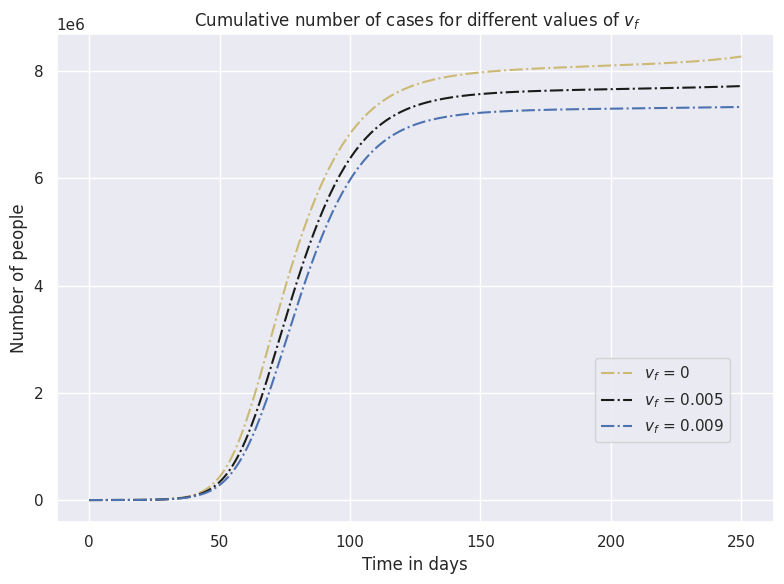

In [22]:
# Plotting different graphs of co-infected for different values of u_3 (Vaccination to Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vf = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u3_values = [0, 0.005, 0.009]
for u3 in u3_values:
    # Reset time and initial conditions for each u_3 values (Vaccination to Influenza)
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum2 = y0[25]
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u3
    results.append(np.array(current_results))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', '-', '-', '-']
colors = ['y', 'k', 'b', 'g']
for i, u3 in enumerate(u3_values):
    ax.plot(times, sum_compartments2[i, :], label=f'$v_f$ = {u3}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $v_f$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_coinf_dynamics_vf_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u3 in enumerate(u3_values):
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_f = {u3}$', line=dict(color=colors[i], dash=line_styles[2]))
    traces.extend([trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_f$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_Coinf_Vf.png")
# Show figure
fig.show()



>## Plotting different graphs of cumulative infections for different values of u_4 (vaccines efficacy)

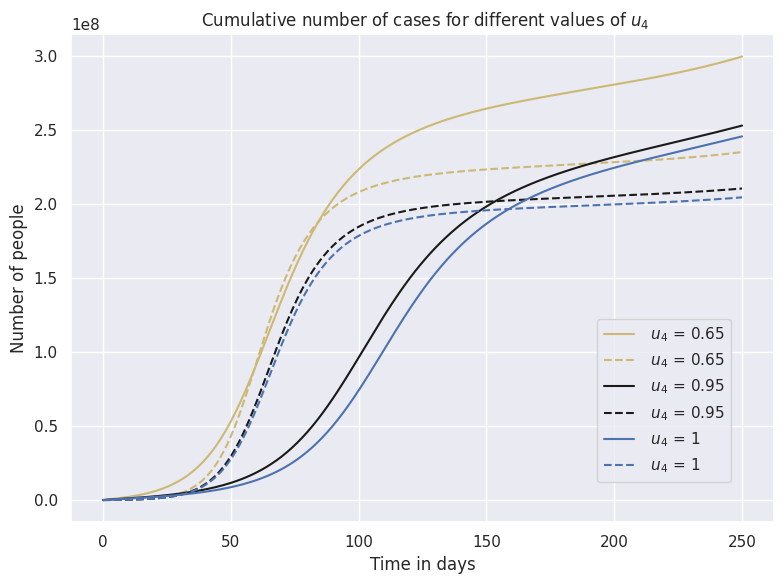

In [23]:
# Plotting different graphs of cumulative infections for different values of u_4 (vaccines efficacy)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
ec=1
ef=1
u1=0
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u4 values
u4_values = [0.65, 0.95, 1]
for u4 in u4_values:
    # Reset time and initial conditions for each u4_values
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u4_values
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u4 in enumerate(u4_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $u_4$ = {u4}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $u_4$ = {u4}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_4$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u4_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u4 in enumerate(u4_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$u_4 = {u4}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$u_4 = {u4}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace1, trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } u_4$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_u4.png")
# Show figure
fig.show()


## Plotting different graphs of cumulative infections for different values of u_5 (improving the recovery of symptomatic infectious)

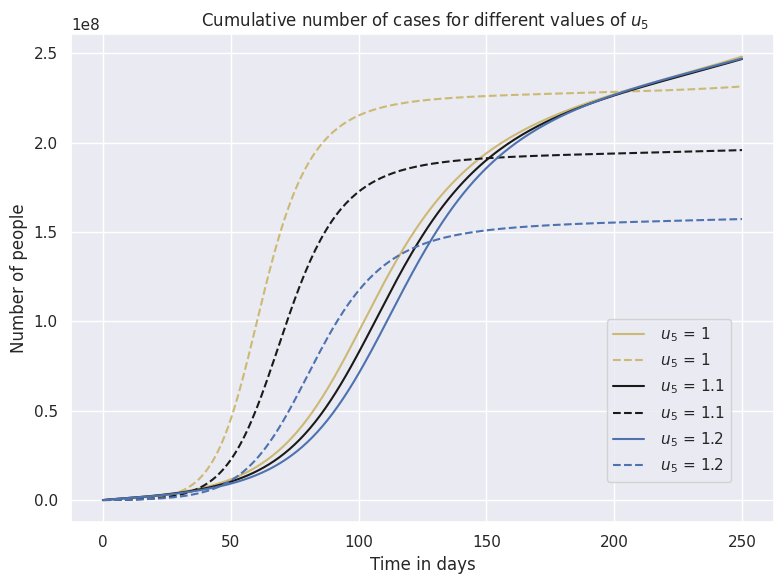

In [24]:
# Plotting different graphs of cumulative infections for different values of u_5 (improving the recovery of symptomatic infectious)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions

t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u5_values = [1, 1.1, 1.2]
for u5 in u5_values:
    # Reset time and initial conditions for each u5_values
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u5_values
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u5 in enumerate(u5_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $u_5$ = {u5}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $u_5$ = {u5}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_5$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95 , 0.25), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u5_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u5 in enumerate(u5_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$u_5 = {u5}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$u_5 = {u5}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace1, trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } u_5$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_u5.png")
# Show figure
fig.show()


## Plotting different graphs of co-infected for different values of u_5 (improving the recovery of symptomatic infectious)

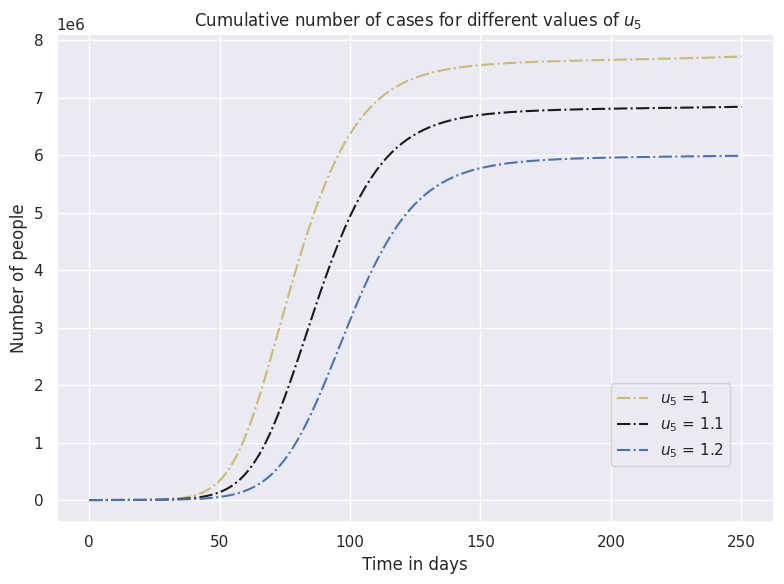

In [25]:
# Plotting different graphs of cumulative infections for different values of u_5 (improving the recovery of symptomatic infectious)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions

t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u5_values = [1, 1.1, 1.2]
for u5 in u5_values:
    # Reset time and initial conditions for each u5_values
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum2 = y0[25]
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u5_values
    results.append(np.array(current_results))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u5 in enumerate(u5_values):
    ax.plot(times, sum_compartments2[i, :], label=f'$u_5$ = {u5}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_5$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.20), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_co-infected_u5.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u5 in enumerate(u5_values):
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$u_5 = {u5}$', line=dict(color=colors[i], dash=line_styles[2]))
    traces.extend([trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } u_5$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_Coinf_u5.png")
# Show figure
fig.show()



# Two fold optimization:

In [26]:
print(u1)

0


## Plotting different graphs of cumulative infections for u1=0.2 and different u2 (NPI and vaccination to COVID-19)

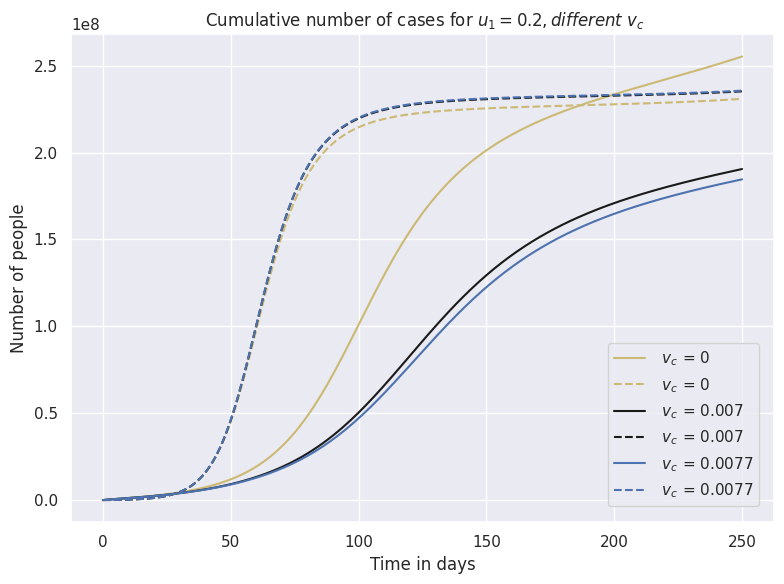

In [27]:
# Plotting different graphs of cumulative infections for u1=0.2 and different u2 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u2_values = [0, 0.007, 0.0077]
for u2 in u2_values:
    # Reset time and initial conditions for each u2
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u2
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $v_c$ = {u2}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $v_c$ = {u2}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for $u_1=0.2,\t{different}$ $ v_c$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.99, 0.20), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u1u2_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u2 in enumerate(u2_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$v_c = {u2}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_c = {u2}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace1, trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_c \text{ and }u_1=0.2$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_u1-fxd_Vc.png")
# Show figure
fig.show()



## Plotting different graphs of co-infected for u1=0.2 and different u2 (NPI and vaccination to COVID-19)

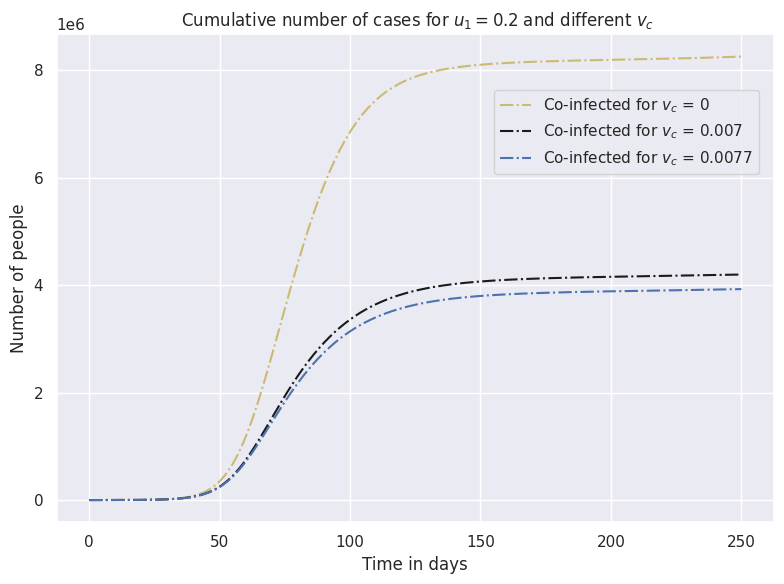

In [28]:
# Plotting different graphs of co-infected for u1=0.2 and different u2 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments2 = []  # Sum of  IE, IA, II, IH

# Loop over u2 values
u2_values = [0, 0.007, 0.0077]
for u2 in u2_values:
    # Reset time and initial conditions for each u2
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum2 = y0[25]
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u2
    results.append(np.array(current_results))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments2[i, :], label=f'Co-infected for $v_c$ = {u2}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for $u_1=0.2 $ and different $ v_c$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.99, 0.80), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_co-dynamics_u1u2_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u2 in enumerate(u2_values):
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_c = {u2}$', line=dict(color=colors[i], dash=line_styles[2]))
    traces.extend([trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_c \text{ and }u_1=0.2$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_Coinf_u1-fxd_Vc.png")
# Show figure
fig.show()




In [29]:
print(u2)

0.0077


## Plotting different graphs of cumulative infections for u1=0.2,u2 = 0.0007 and different u3 (Vaccination to Influenza)

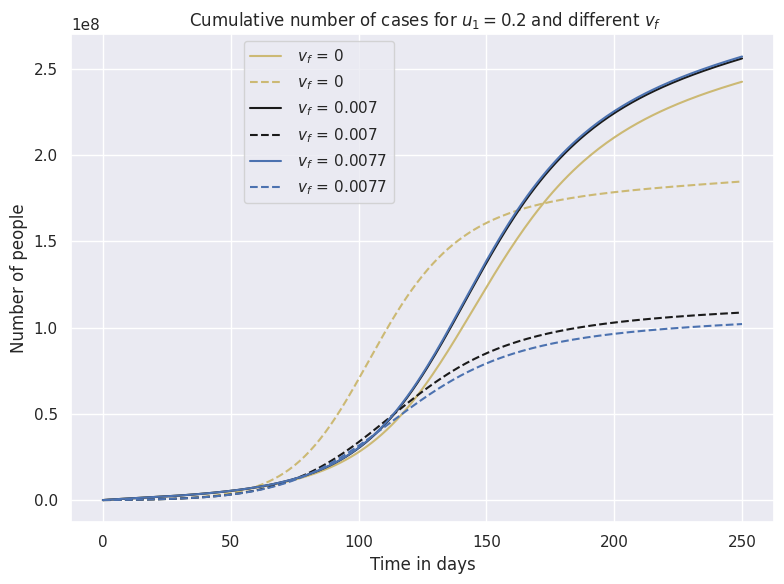

In [30]:
# Plotting different graphs of cumulative infections for u1=0.2,u2 = 0.0007 and different u3 (Vaccination to Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameters for time dependent control measures:
vc=1
u1 = 0.2
u2 = 0.0007
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vf = 1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u3_values = [0, 0.007, 0.0077]
for u3 in u3_values:
    # Reset time and initial conditions for each u_3 values (Vaccination to Influenza)
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = y0[23]
        sum2 = y0[24]
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u3
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u3 in enumerate(u3_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $v_f$ = {u3}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f' $v_f$ = {u3}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for $u_1=0.2$ and different $v_f$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.47, 0.82), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u1u3_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u3 in enumerate(u3_values):
    trace1 = go.Scatter(x=times, y=sum_compartments1[i], mode='lines', name=f'$v_f = {u3}$', line=dict(color=colors[i], dash=line_styles[0]))
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_f = {u3}$', line=dict(color=colors[i], dash=line_styles[1]))
    traces.extend([trace1, trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_f \text{ with fixed }u_1=0.2, v_c=0.0007$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_dynamics_u1Vc-fxd_Vf.png")
# Show figure
fig.show()


## Plotting different graphs of co-infected for u1=0.2,u2 = 0.0007 and different u3 (Vaccination to Influenza)

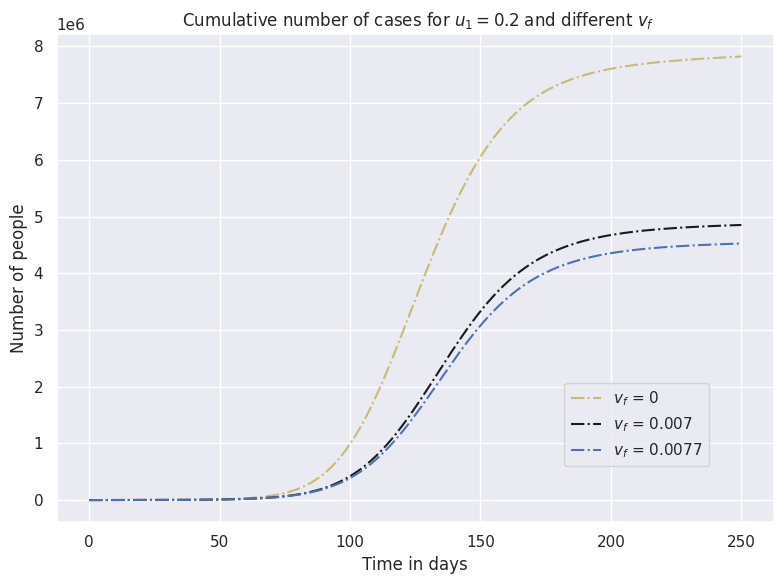

In [31]:
# Plotting different graphs of co-infected for u1=0.2,u2 = 0.0007 and different u3 (Vaccination to Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameters for time dependent control measures:
vc=1
u1 = 0.2
u2 = 0.0007
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vf = 1
t_end = 250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u3_values = [0, 0.007, 0.0077]
for u3 in u3_values:
    # Reset time and initial conditions for each u_3 values (Vaccination to Influenza)
    t = 0
    y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
    current_results = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum2 = y0[25]
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u3
    results.append(np.array(current_results))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u3 in enumerate(u3_values):
    ax.plot(times, sum_compartments2[i, :], label=f'$v_f$ = {u3}', linestyle='-.', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for $u_1=0.2$ and different $v_f$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.92, 0.2), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_co-infected_u1u3_finalmodel.png')

# Display the figure
plt.show()
########################### Plot using plotly
# Create traces for plotly
traces = []
line_styles = ['solid', 'dash','dashdot','longdash','longdashdot']#['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u3 in enumerate(u3_values):
    trace2 = go.Scatter(x=times, y=sum_compartments2[i], mode='lines', name=f'$v_f = {u3}$', line=dict(color=colors[i], dash=line_styles[2]))
    traces.extend([ trace2])

# Create layout
layout = go.Layout(
    title=dict(text=r'$\text{Cumulative number of cases for different values of } v_f \text{ with fixed }u_1=0.2, v_c=0.0007$', x=0.5),
    xaxis=dict(title='Time in days'),
    yaxis=dict(title='Number of people'),
    legend=dict(x=0.05, y=0.80),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Create figure
fig = go.Figure(data=traces, layout=layout)
# Save the figure as a PNG file
fig.write_image("figure_Cum_Coinf_u1Vc-fxd_Vf.png")
# Show figure
fig.show()


# Three fold optimization

## Plotting different graphs of cumulative infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19, Influenza)

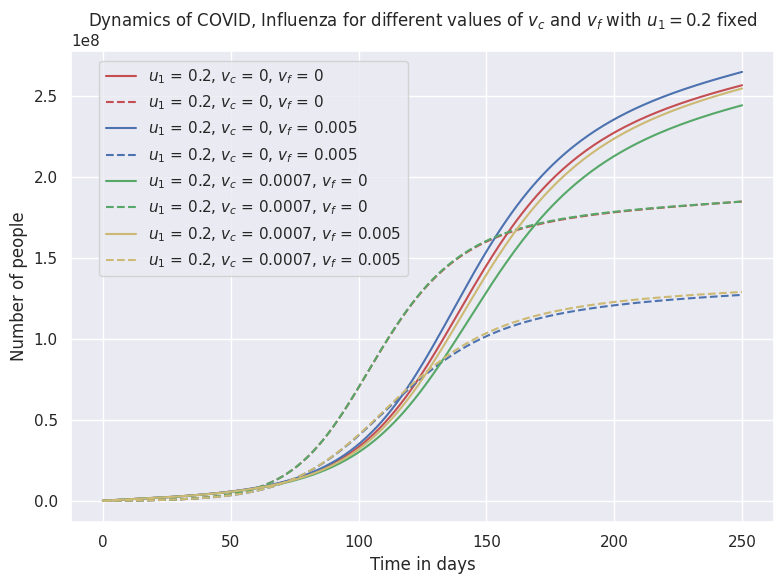

In [32]:
# Three fold optimization with each of u1, u2, u3 having their own value sets
# Plotting different graphs of cumulative infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19, Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589


# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
# u1 = 0.0
# u2 = 1
# u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# u1, u2, u3 values to Loop over:
u1_values = [0.2]
u2_values = [0, 0.0007]
u3_values = [0, 0.005]

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = y0[23]
                sum2 =  y0[24]
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum1, label=f'$u_1$ = {u1}, $v_c$ = {u2}, $v_f$ = {u3}', linestyle='-', color=color)
            ax.plot(times, current_sum2, label=f'$u_1$ = {u1}, $v_c$ = {u2}, $v_f$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of COVID, Influenza for different values of $v_c$ and $v_f$ with $u_1=0.2$ fixed')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(0.49 , 0.75), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u1-fxd_u2u3_finalmodel.png')

# Display the figure
plt.show()

########################### Using plotly
# Plot the results
fig = go.Figure()

# Define colors for each combination of u1, u2, and u3
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'cyan','orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
                  30456000, 20000, 5000, 7000, 5000, 4000, 1000,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0]
            current_sum1 = []
            current_sum2 = []

            while t <= t_end:
                current_sum1.append(y0[23])
                current_sum2.append(y0[24])

                sol = solve_ivp(model1, [t, t + 1], y0, args=(betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                               etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            fig.add_trace(go.Scatter(x=list(range(t_end + 1)), y=current_sum1, mode='lines', name=f'$v_c = {u2}, v_f = {u3}$ ', line=dict(color=color)))
            fig.add_trace(go.Scatter(x=list(range(t_end + 1)), y=current_sum2, mode='lines', name=f'$v_c = {u2} , v_f = {u3}$ ', line=dict(color=color, dash='dash')))

# Set layout properties
fig.update_layout(
    xaxis_title='Time in days',
    yaxis_title='Number of people',
    title=dict(text=r'$\text{Dynamics of COVID and Influenza infected for different values of } v_c \text{and } v_f \text{with } u_1=0.2 \text{ fixed}$', x=0.5),
    legend=dict(x=0.05, y=0.85),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Save the figure as an image
fig.write_image('figure_Cum_u1-fxd_u2u3.png')

# Show the figure
fig.show()




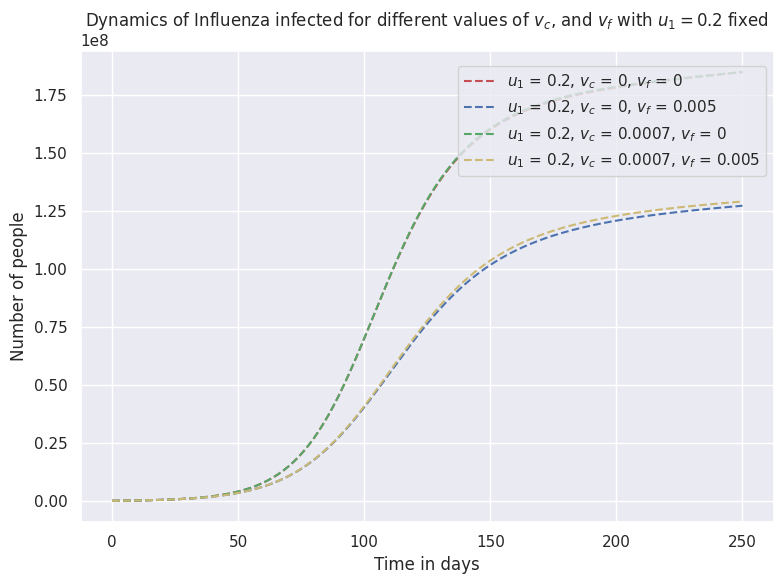

In [33]:
# For influenza only
# Three fold optimization with each of u1, u2, u3 having their own value sets
# Plotting different graphs of cumulative infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19, Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589


# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
# u1 = 0.0
# u2 = 1
# u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# u1, u2, u3 values to Loop over:
u1_values = [0.2]
u2_values = [0, 0.0007]
u3_values = [0, 0.005]

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = y0[23]
                sum2 =  y0[24]
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            #ax.plot(times, current_sum1, label=f' $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-', color=color)
            ax.plot(times, current_sum2, label=f'$u_1$ = {u1}, $v_c$ = {u2}, $v_f$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of Influenza infected for different values of $v_c$, and $v_f$ with $u_1=0.2$ fixed')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.85), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_Cum_dynamics_u1-fxd_u2u3_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of co-infected for different values of u1,u2 and u3 (NPI and vaccination to COVID-19, Influenza)

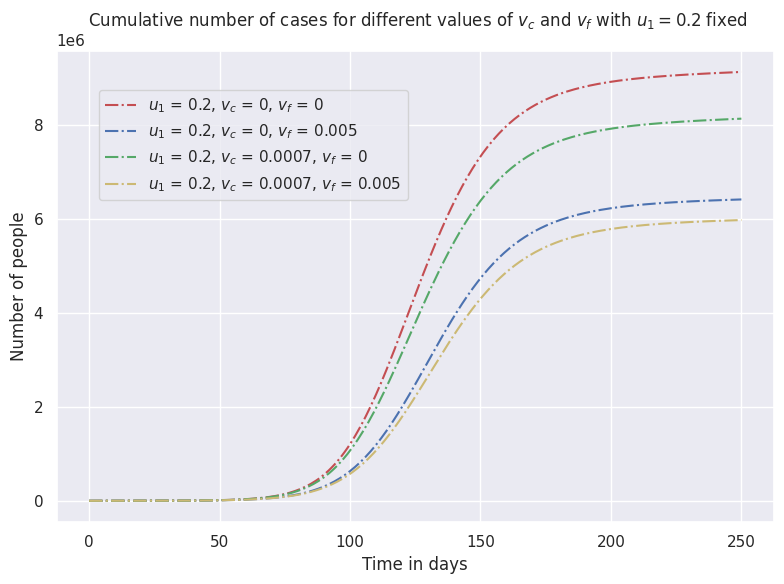

In [34]:
# Three fold optimization with each of u1, u2, u3 having their own value sets
# Plotting different graphs of co-infected for different values of u1,u2 and u3 (NPI and vaccination to COVID-19, Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589


# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
# u1 = 0.0
# u2 = 1
# u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# u1, u2, u3 values to Loop over:
u1_values = [0.2]
u2_values = [0, 0.0007]
u3_values = [0, 0.005]

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum2 =  y0[25]
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum2, label=f'$u_1$ = {u1}, $v_c$ = {u2}, $v_f$ = {u3}', linestyle='-.', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $v_c$ and $v_f$ with $u_1=0.2$ fixed')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(0.50, 0.80), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_complete_co-dynamics_u1u2u3_finalmodel.png')

# Display the figure
plt.show()

##############################
# Plot the results
fig = go.Figure()

# Define colors for each combination of u1, u2, and u3
colors = ['red', 'blue', 'green', 'black','cyan', 'magenta', 'yellow', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
                  30456000, 20000, 5000, 7000, 5000, 4000, 1000,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0]
            current_sum3 = []

            while t <= t_end:
                current_sum3.append(y0[25])


                sol = solve_ivp(model1, [t, t + 1], y0, args=(betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                               etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            fig.add_trace(go.Scatter(x=list(range(t_end + 1)), y=current_sum3, mode='lines', name=f'$v_c = {u2}, v_f = {u3}$ ', line=dict(color=color, dash='dashdot')))

# Set layout properties
fig.update_layout(
    xaxis_title='Time in days',
    yaxis_title='Number of people',
    title=dict(text=r'$\text{Cumulative co-infected for different values of } v_c \text{and } v_f \text{with } u_1\text{ fixed}$', x=0.5),
    legend=dict(x=0.05, y=0.85),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Save the figure as an image
fig.write_image('figure_Cum_Coinf_u1-fxd_u2u3.png')

# Show the figure
fig.show()




## Plotting different graphs of co-infected for different values of u1,u2,u3,and u5

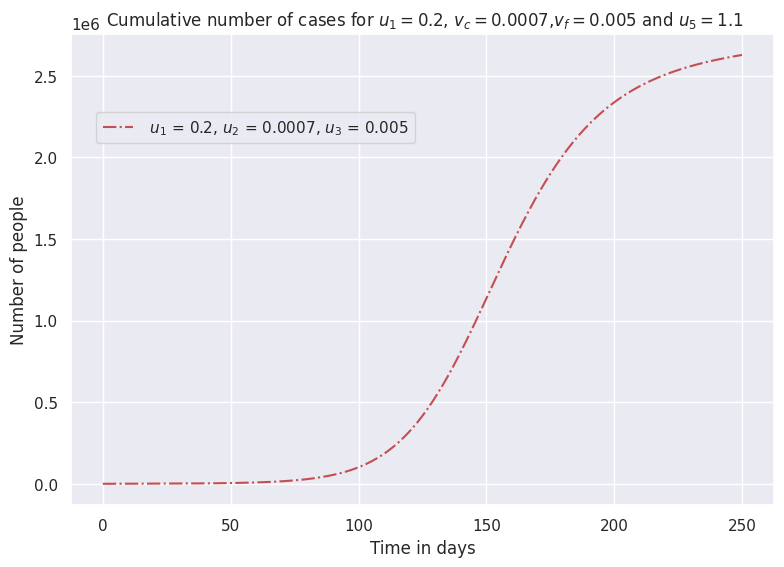

In [35]:
# Three fold optimization with each of u1, u2, u3 having their own value sets
# Plotting different graphs of co-infected for different values of u1,u2,u3 and u5 (NPI and vaccination to COVID-19, Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589


# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
# u1 = 0.0
# u2 = 1
# u3 = 1
u4 = 1
u5 = 1.1

# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# u1, u2, u3 values to Loop over:
u1_values = [0.2]
u2_values = [0.0007]
u3_values = [0.005]

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum2 =  y0[25]
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum2, label=f' $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-.', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for $u_1=0.2$, $v_c=0.0007$,$v_f=0.005$ and $u_5=1.1$')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(0.50, 0.80), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_co-dynamics_u1u2u3u4.png')

# Display the figure
plt.show()

##############################
# Plot the results
fig = go.Figure()

# Define colors for each combination of u1, u2, and u3
colors = ['red', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'black', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
                  30456000, 20000, 5000, 7000, 5000, 4000, 1000,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0]
            current_sum3 = []

            while t <= t_end:
                current_sum3.append(y0[25])


                sol = solve_ivp(model1, [t, t + 1], y0, args=(betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                               etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            fig.add_trace(go.Scatter(x=list(range(t_end + 1)), y=current_sum3, mode='lines', name=f'$v_c = {u2}, v_f = {u3}$ ', line=dict(color=color, dash='dashdot')))

# Set layout properties
fig.update_layout(
    xaxis_title='Time in days',
    yaxis_title='Number of people',
    title=dict(text=r'$\text{Cumulative co-infected for } v_c=0.0007, v_f=0.005, u_1=0.2\text{ and } u_5=1.1$', x=0.5),
    legend=dict(x=0.05, y=0.85),
    margin=dict(t=40,b=10,l=10,r=10),  # Adjust this value to decrease the space between title and figure
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Save the figure as an image
fig.write_image('figure_Cum_Coinf_u1-fxd_u2u3.png')

# Show the figure
fig.show()




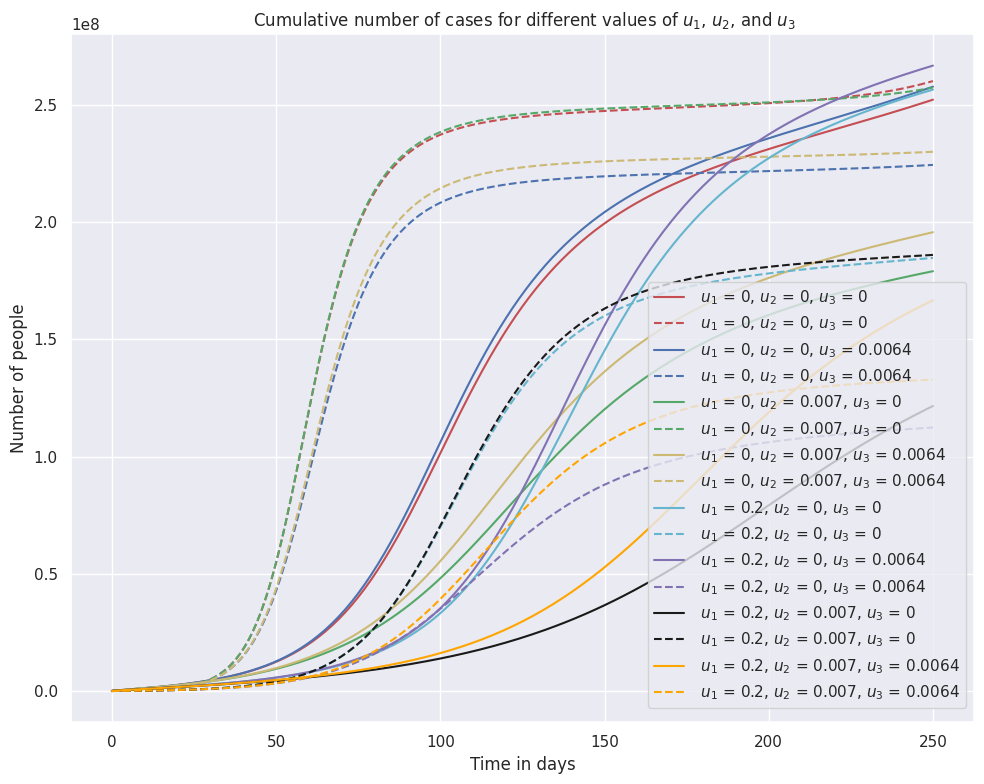

In [36]:
# Three fold optimization (trying to plot the final size)
# Plotting different graphs of cumulative infected for different values of u1,u2 and u3 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589


# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0.0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = [20]  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = [20]  # Sum of KS, IE, IA, II, IH, IR

# Loop over u1 values
u1_values = [0, 0.2]
u2_values = [0, 0.007]
u3_values = [0, 0.0064]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[23])
                sum2 = np.sum(y0[24])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum1, label=f' $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-', color=color)
            ax.plot(times, current_sum2, label=f' $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_1$, $u_2$, and $u_3$')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.33), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_cumulative_u1u2u3_finalmodel.png')

# Display the figure
plt.show()


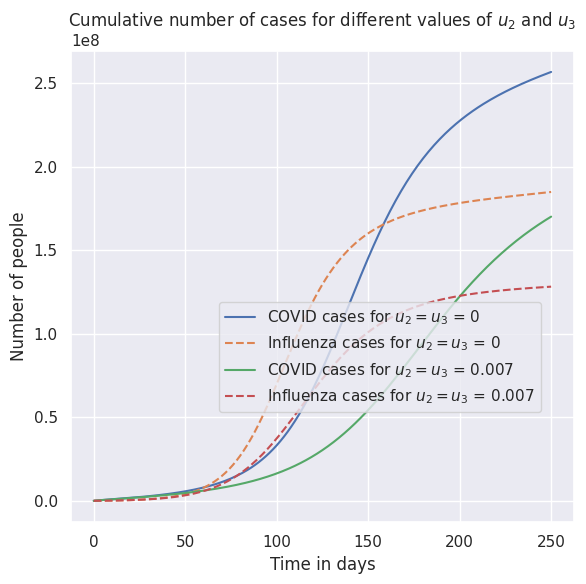

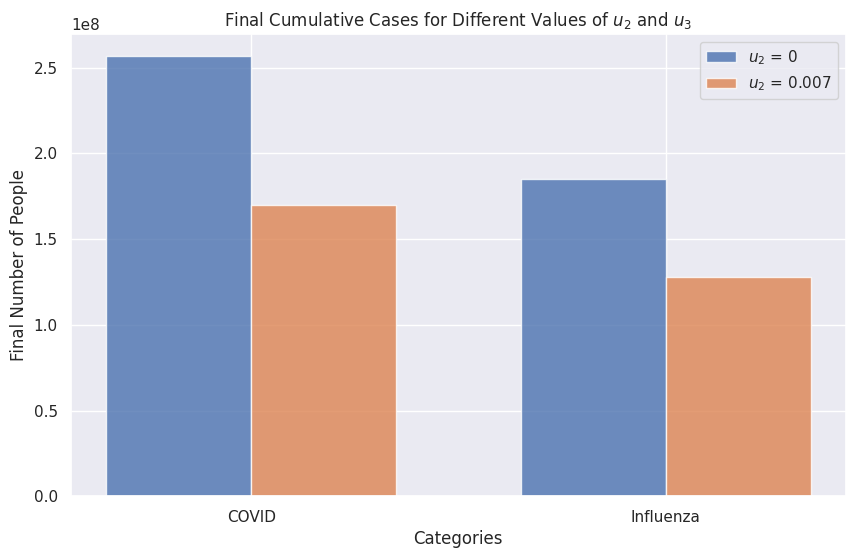

In [37]:
# Three fold optimization with  u2=u3 in [0, 0.007]
# Plotting different graphs of cumulative infections for u1=0.2, u2 and u3 in [0, 0.007]
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values: same
# Parameters related to vaccination:

wc = 1/180
ec = 0.94

# vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0.2
u2_values = [0, 0.007]
u4 = 1
u5 = 1
# u2, u3 in [0, 0.007]
# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2, u3 values

for u3 in u2_values:
    for u2 in u2_values:
        if u2 == u3:
            # Reset time and initial conditions for each u2
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[23])
                sum2 = np.sum(y0[24])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]
        else:
            continue

        # Append the results for the current u2
        results.append(np.array(current_results))
        sum_compartments1.append(np.array(current_sum1))
        sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID cases for $u_2=u_3$ = {u2}')
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza cases for $u_2=u_3$ = {u2}', linestyle='--')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Cumulative number of cases for different values of $u_2$ and $u_3$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.35), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_cumulative_u2u3_finalmodel.png')

# Display the figure
plt.show()

################ for bar graph
# Plot the results as bar charts for the final values
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8
index = np.arange(2)  # Two categories: COVID and Influenza

for i, u2 in enumerate(u2_values):
    final_sum1 = sum_compartments1[i, -1]
    final_sum2 = sum_compartments2[i, -1]

    ax.bar(index + i * bar_width, [final_sum1, final_sum2], bar_width,
           alpha=opacity, label=f'$u_2$ = {u2}')

ax.set_xlabel('Categories')
ax.set_ylabel('Final Number of People')
ax.set_title('Final Cumulative Cases for Different Values of $u_2$ and $u_3$ ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['COVID', 'Influenza'])

ax.legend()

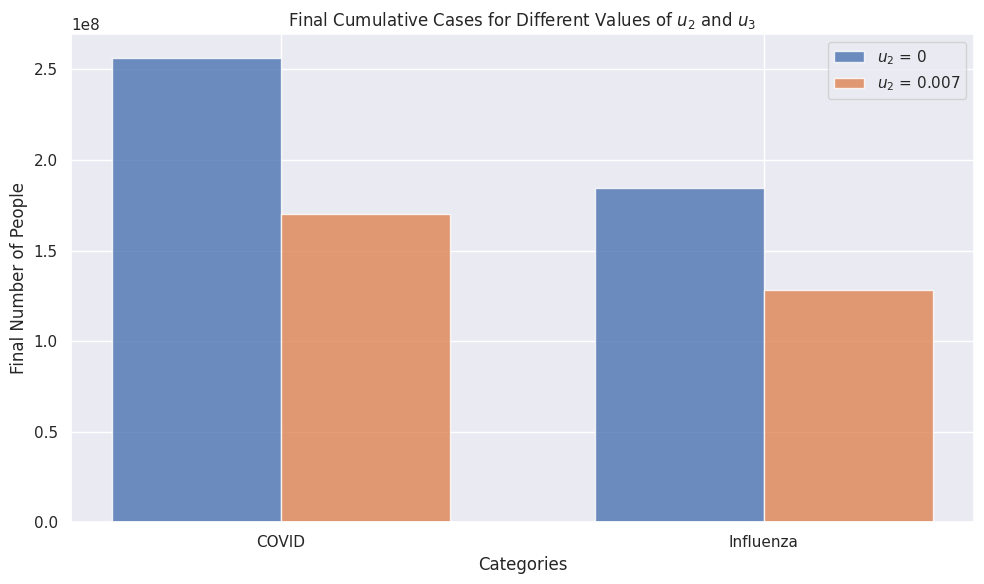

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ... (same code as before)

# Plot the results as bar charts for the final values
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8
index = np.arange(2)  # Two categories: COVID and Influenza

for i, u2 in enumerate(u2_values):
    final_sum1 = sum_compartments1[i, -1]
    final_sum2 = sum_compartments2[i, -1]

    ax.bar(index + i * bar_width, [final_sum1, final_sum2], bar_width,
           alpha=opacity, label=f'$u_2$ = {u2}')

ax.set_xlabel('Categories')
ax.set_ylabel('Final Number of People')
ax.set_title('Final Cumulative Cases for Different Values of $u_2$ and $u_3$ ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['COVID', 'Influenza'])

ax.legend()

plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_final_cumulative_cases.png')

# Display the figure
plt.show()


# Influenza only model

Betaf used=  0.353
Reproduction number(R_e):= 1.5158420136566442
Betaf for R_0=1 is: 0.2328738726197878


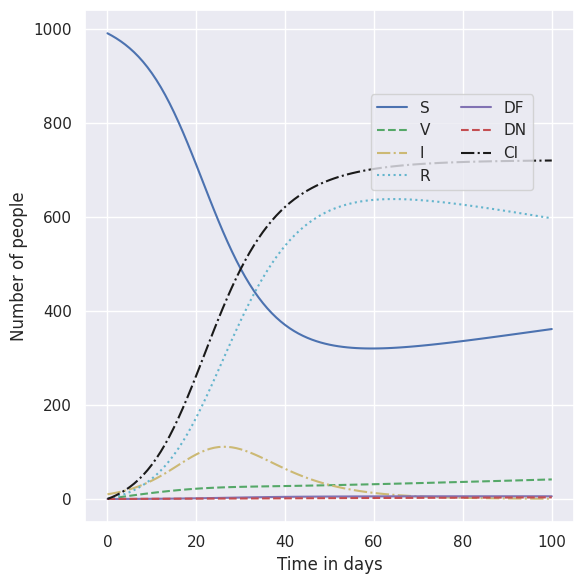

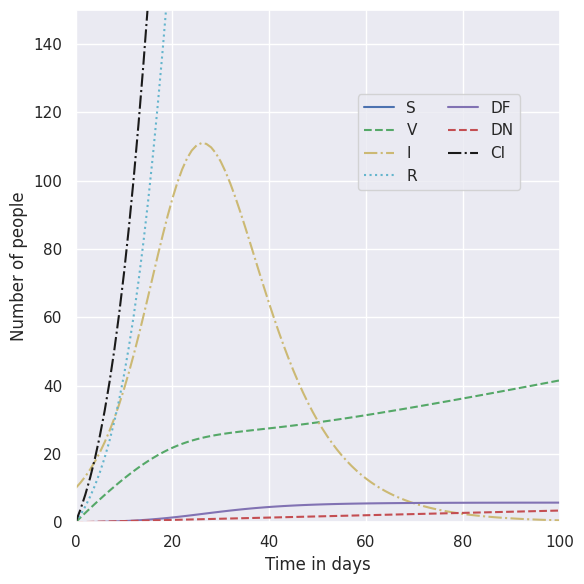

In [39]:
# This is final Influenza model with vaccination...
# This is Influenza only model SVIRS
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def model_inf_Final(t, y,  betaf, gammaf,thetaf, mu, muf, vf, wf,ef, N):
    S, V, I, R, DF, DN, CI = y
    Lambda = mu* (S+V+I+R)+ muf*I
    dS_dt = Lambda + wf * V + thetaf* R -betaf *I *S/N -(mu + vf)*S
    dV_dt = vf *S -(1-ef)*betaf * I*V/N -(mu+ wf)*V
    dI_dt = betaf * I*S/N  +(1-ef)*betaf * I*V/N -(gammaf +mu + muf)*I
    dR_dt = gammaf * I -(mu + thetaf)*R
    dDF_dt=muf*I
    dDN_dt= mu* (S+V+I+R)
    dCI_dt= betaf * I*S/N +(1-ef)*betaf* I*V/N
    return [dS_dt, dV_dt, dI_dt, dR_dt, dDF_dt, dDN_dt, dCI_dt ]

# General disese progression parameter values:

# Parameter values:
N = 1000

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589


# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf =  0.005
wf = 1/180
ef = 0.632

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Define reproduction number
R_e= betaf *( mu+ wf + (1-ef)* vf)/ ((gammaf+ mu + muf)*(mu + wf + vf))
print("Betaf used= ",betaf)
print( "Reproduction number(R_e):=", R_e)
Betaf= ((gammaf+ mu + muf)*(mu + wf + vf))/( mu+ wf + (1-ef)* vf)
print("Betaf for R_0=1 is:", Betaf)
# Parameters for time dependent control measures:


# Initialize time and initial conditions
t = 0
t_end = 100
y0 = [990, 0, 10, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
  times.append(t)
  results.append(y0)
  sol_inf_Final = solve_ivp(model_inf_Final, [t, t + 1], y0, args=( betaf, gammaf,thetaf, mu, muf, vf, wf,ef, N))

  t = t + 1
  y0 = sol_inf_Final.y[:, -1]

# Convert results to a numpy array for easier manipulation
results_Final = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results_Final)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['S', 'V', 'I', 'R', 'DF', 'DN','CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.85), ncol=2)
# You can adjust bbox_to_anchor to control the legend position relative to the plot

plt.tight_layout()

plt.savefig('fig_Inf_Final.png')
# plt.show()


#################################################################
# The following code is to zoom a portion of graph

fig, ax = plt.subplots(figsize=(6, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# Set x-axis limits to zoom in from 0 to 100 days
ax.set_xlim(0, 100)
ax.set_ylim(0,150)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['S', 'V', 'I', 'R', 'DF', 'DN', 'CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.85), ncol=2)
# You can adjust bbox_to_anchor to control the legend position relative to the plot

plt.tight_layout()

# plt.savefig('fig.png')
# plt.show()

#############################################################


# COVID only model

Betac ued=  0.30402
Reproduction number=  2.0927063254066383
Betac to be for R_0=1 is: 0.14527599802658656


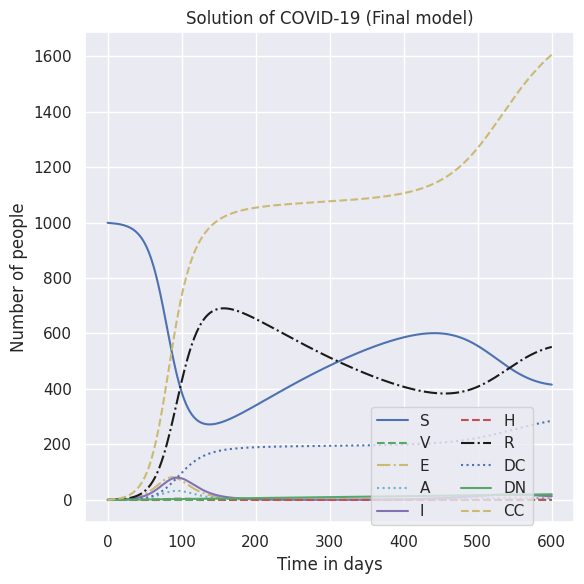

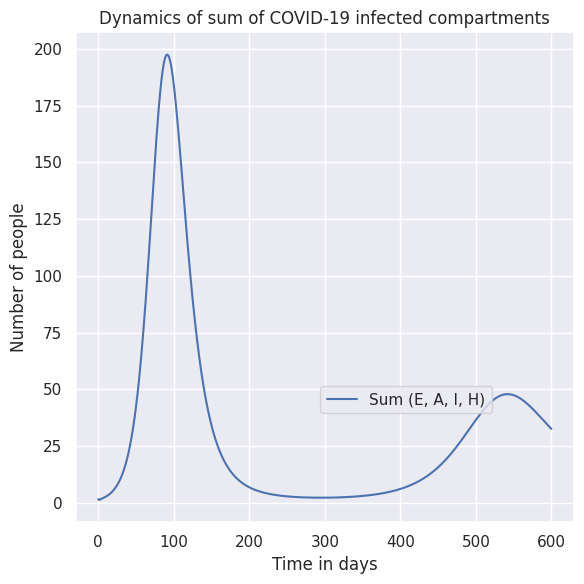

In [40]:
# This is Covid-19 only model.....
# Final model
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def model_cov_Finl(t, y,  betac, deltac, gammacA, gammacI,
              gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc, hc, kappa2, wc, ec, N):
    S, V, E, A, I, H, R, DC, DN, CC = y
    Lambda = mu*(S+V+E+A+I+H+R)+ muc* I + kappa2*muc* H
    dS_dt = Lambda + thetac * R +wc *V -(betac *(etaA *A+ I +etaH*H)/N + mu +vc)*S
    dV_dt = vc*S-((1-ec)*betac *(etaA *A+I +etaH*H)/N + mu + wc)*V
    dE_dt = (1-ec)*betac *(etaA *A+I +etaH*H)*V /N + betac *(etaA *A+I +etaH*H)*S /N -(deltac +mu)*E
    dA_dt = (1-alpha)*deltac*E -(gammacA +mu)*A
    dI_dt = alpha*deltac*E -((1-q)*gammacI +q*hc +mu +muc)*I
    dH_dt = q*hc* I- (gammacH + mu +kappa2*muc)*H
    dR_dt = gammacA*A + (1-q)*gammacI* I +gammacH*H -(mu +thetac)*R
    dDC_dt= muc* I + kappa2*muc* H
    dDN_dt= mu*(S+V+E+A+I+H+R)
    dCC_dt=(1-ec)*betac *(etaA *A+ I +etaH*H)*V /N + betac *(etaA *A+I +etaH*H)*S /N # this is cumulative of COVID-19 cases arising
    return [dS_dt, dV_dt, dE_dt, dA_dt, dI_dt, dH_dt, dR_dt, dDC_dt, dDN_dt, dCC_dt]

# Parameters values
# Parameter values:
N = 1000  #338417798

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.30402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.2530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007 *0
wc = 1/180 *0
ec = 0.94 *0

vf = 0.6*0.007*0
wf = 1/180*0
ef = 0.67*0

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# # Calculating reproduction number:

term1= (mu + wc + (1-ec)* vc)/(mu + wc+ vc)
K_7= deltac + mu
K_8= gammacA +mu
K_9= (1-q) * gammacI + q*hc +mu + muc
K_Ten = gammacH + mu + kappa2* muc
sum1=  (1-alpha)* deltac* etaA / (K_7*K_8)
sum2= alpha* deltac/ (K_7* K_9)
sum3=  alpha* deltac* q* hc* etaH/(K_7* K_9* K_Ten)
Re_c= term1* betac* (sum1+sum2+sum3)

print("Betac ued= ", betac)
#  return Re_c
print("Reproduction number= ", Re_c)
# R_e= betaf *( mu+ wf + (1-ef)* vf)/ ((gammaf+ mu + muf)*(mu + wf + vf))
# print( "Reproduction number(R_e):=", R_e)
Betac= 1/((sum1+sum2+sum3)*term1)

print("Betac to be for R_0=1 is:", Betac)
# Parameters for time dependent control measures:


# Initialize time and initial conditions
t = 0
t_end = 600
y0 = [999, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# Lists to store the results at each time step
times = []
results = []
sum_compartments1=[]

# Integration loop with a fixed time step of 1 day
while t <= t_end:
  times.append(t)
  results.append(y0)
  sum_compartments1.append(sum1)
  sol_cov_Finl = solve_ivp(model_cov_Finl, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI,
                                                       gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc,
                                                       hc, kappa2, wc, ec, N))

  t = t + 1
  y0 = sol_cov_Finl.y[:, -1]
  sum1 = np.sum(y0[2:6])
  # print(t,y0[8]) # this gives cumulative covid infected

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title("Solution of COVID-19 (Final model)")
# Adjust legend position and size
legend = ax.legend(['S', 'V', 'E', 'A', 'I', 'H', 'R', 'DC', 'DN','CC'],
                   loc='upper center', bbox_to_anchor=(0.75 , 0.25), ncol=2)


plt.tight_layout()

plt.savefig('fig_cov_Final.png')
# plt.show()

###########  Plot only the infected curves
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(times, sum_compartments1, label='Sum (E, A, I, H)')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title("Dynamics of sum of COVID-19 infected compartments")
# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85 , 0.25), ncol=1)

plt.tight_layout()

plt.savefig('fig_covid_Infected.png')
# plt.show()


# This piece of code is for printing the total number of infected peoples from COVID, Influenza and both

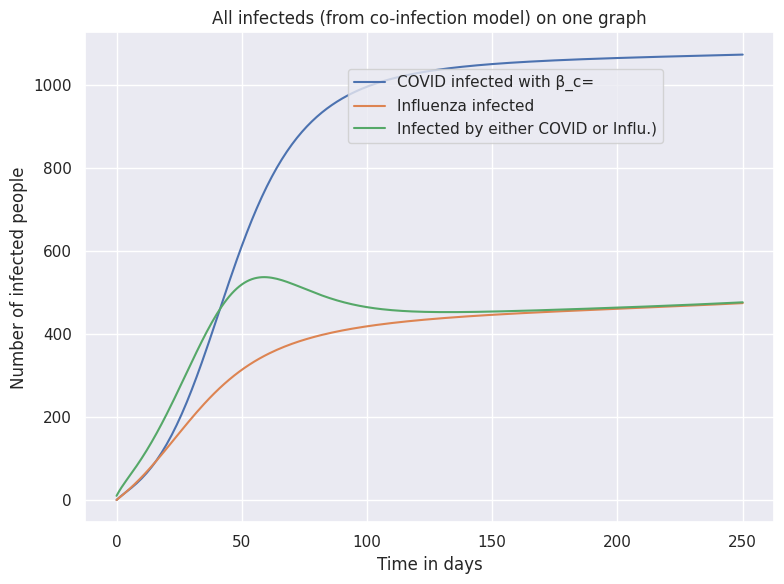

In [41]:
# This piece of code is for printing the total number of infected peoples from COVID, Influenza and both
# Initialize time and initial conditions
t = 0
t_end =250
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []

sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH ,IR
sum_compartments3 = []  # Sum of all KS, IE, SE, SA, SI, SH, IA, II, IH, RE, RA, RI, RH

while t <= t_end:
    times.append(t)
    results.append(y0)

    # Calculate sums
    sum1 = y0[23]
    sum2 =  y0[24]
    sum3 = np.sum(y0[2:6] + y0[15:19])+sum2

    sum_compartments1.append(sum1)
    sum_compartments2.append(sum2)
    sum_compartments3.append(sum3)

    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]

results = np.array(results)

# print(sum(np.round(results)))
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Plot only the three curves
ax.plot(times, sum_compartments1, label='COVID infected with β_c=')
ax.plot(times, sum_compartments2, label='Influenza infected')
ax.plot(times, sum_compartments3, label='Infected by either COVID or Influ.)')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of infected people')
ax.set_title('All infecteds (from co-infection model) on one graph')
# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85, 0.85), ncol=1)

plt.tight_layout()

plt.savefig('fig_all_infected_on_one_graph.png')
# plt.show()


# Printing infected from COVID via both covid only model and co-infection model

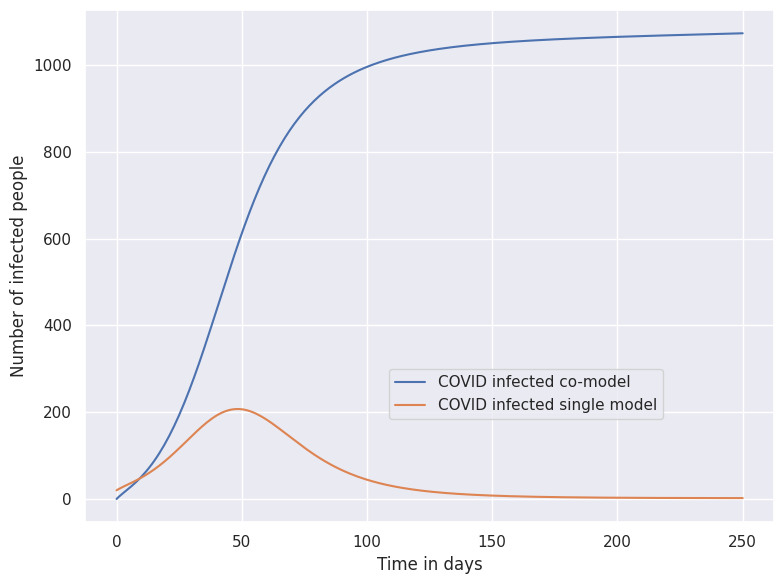

In [42]:
# Printing infected from both COVId only model and the co-infection model
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Initialize time and initial conditions
t = 0
t_end =250
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
z0 = [980, 0, 0, 0, 20, 0, 0, 0, 0, 0]
times = []
results1 = []  # Results for the first model
results2 = []  # Results for the second model

sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH for model1
sum_compartments2 = []  # Infected from COVID only model for model2

while t <= t_end:
    times.append(t)
    results1.append(y0)
    results2.append(z0)

    # Calculate sums for model1
    sum1 = y0[23]
    sum_compartments1.append(sum1)

    # Calculate sums for model2
    sum2 = np.sum(z0[2:6])
    sum_compartments2.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    sol_cov_Finl = solve_ivp(model_cov_Finl, [t, t + 1], z0, args=( betac, deltac, gammacA, gammacI,
                                                       gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc,
                                                       hc, kappa2, wc, ec, N))
    t = t + 1
    y0 = sol.y[:, -1]
    z0 = sol_cov_Finl.y[:, -1]

results1 = np.array(results1)
results2 = np.array(results2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Plot the two curves on the same graph
ax.plot(times, sum_compartments1, label='COVID infected co-model')
ax.plot(times, sum_compartments2, label='COVID infected single model')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of infected people')

# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85 , 0.25), ncol=1)

plt.tight_layout()

plt.savefig('fig2.png')
# plt.show()


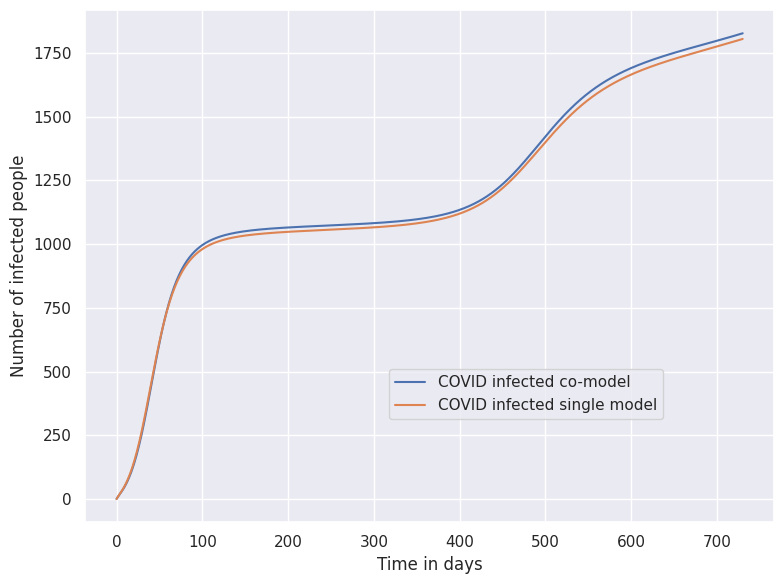

In [43]:
# This is by me
# This piece of code is for printing the total number of infected peoples from COVID using both models
# Initialize time and initial conditions

t = 0
t_end = 730
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
z0 = [980, 0, 0, 0, 20, 0, 0, 0, 0, 0]
times = []
result1 = []
result2 = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Infected from COVID only model


while t <= t_end:
    times.append(t)
    result1.append(y0)
    result2.append(z0)

    # Calculate sums
    sum1 = np.sum(y0[23])
    sum2 = np.sum(z0[9])

    sum_compartments1.append(sum1)
    sum_compartments2.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    sol_cov_Finl= solve_ivp(model_cov_Finl, [t, t + 1], z0, args=( betac, deltac, gammacA, gammacI,
                                                       gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc,
                                                       hc, kappa2, wc, ec, N))
    t = t + 1
    y0 = sol.y[:, -1]
    z0= sol_cov_Finl.y[:,-1]

result1 = np.array(result1)
result2 = np.array(result2)

# print(sum(np.round(results)))
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Plot only the three curves
ax.plot(times, sum_compartments1, label='COVID infected co-model')
ax.plot(times, sum_compartments2, label='COVID infected single model')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of infected people')

# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85 , 0.25), ncol=1)

plt.tight_layout()

plt.savefig('fig_COVinftd_bothmodel.png')
# plt.show()


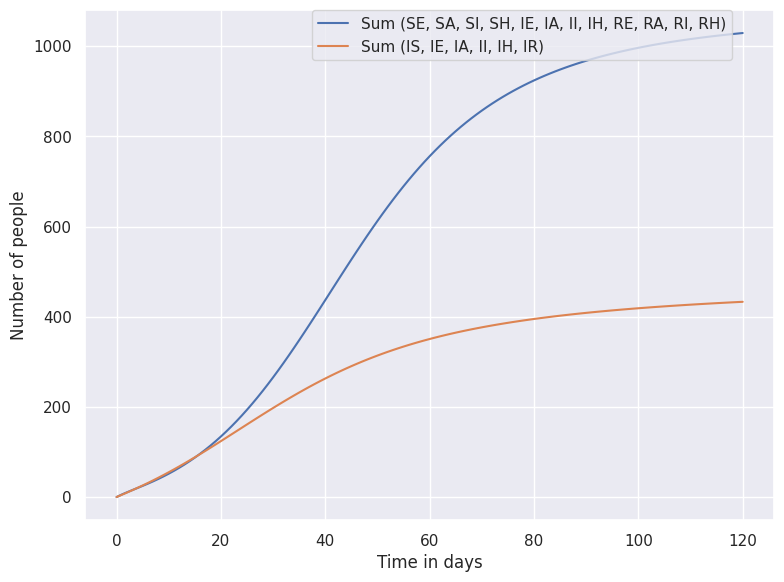

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
# Initialize time and initial conditions
t = 0
t_end = 120
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []

sum_compartments1 = []  # Sum of SE, SA, SI, SH,IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

while t <= t_end:
    times.append(t)
    results.append(y0)

    # Calculate sums
    sum1 = y0[23]
    sum2 =  y0[24]

    sum_compartments1.append(sum1)
    sum_compartments2.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]

# Create a pandas DataFrame to store the results
data = {
    'Time (t)': times,
    'Sum (SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH)': sum_compartments1,
    'Sum (IS, IE, IA, II, IH, IR)': sum_compartments2
}
df = pd.DataFrame(data)

# Print the DataFrame in a nice tabular format
#print(df.to_markdown(index=False))

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(times, sum_compartments1, label='Sum (SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH)')
ax.plot(times, sum_compartments2, label='Sum (IS, IE, IA, II, IH, IR)')
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.95), ncol=1)
plt.tight_layout()

# plt.savefig('fig.png')
# plt.show()  # Display the figure



In [45]:
#print(Lambda)

# Printing results in table

In [46]:
#pip install tabulate

In [47]:
# #This code will print the time in days, the compartment values, and the total number of people for each time step in a table.
from tabulate import tabulate
import csv

# Initialize time and initial conditions
t = 0
t_end = 10
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    times.append(t)
    results.append(y0)
    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Headers for the table
headers = ["Time (days)", "SS", "SV", "SE", "SA", "SI", "SH", "SR", "VS", "IS", "IE", "IA", "II", "IH", "IR", "RS", "RE", "RA", "RI", "RH", "RR", "DC", "DF", "DN", "Total","CovInf"]

# Combine time and results into a list of lists, calculate the row sums, and round the values
data = []
for t, result in zip(times, results):
    row_sum = np.sum(result[0:20])
    covid_infected=np.sum(result[2:6] + result[9:13] + result[15:19])
    rounded_result = [round(value) for value in result]
    data.append([t] + rounded_result + [round(row_sum)]+ [round(covid_infected)])

# Print the table
table = tabulate(data, headers, tablefmt="pretty")
print(table)
# Save the table as a CSV file
with open('output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)
    csvwriter.writerows(data)

print("CSV file saved as 'output.csv'")
######
# # Calculate and print the sum of final values at specific columns
# sum_columns = np.sum(results[:, [3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=0)
# sum_columns_rounded = [round(value) for value in sum_columns]
# print("Sum of final values at specific columns:")
# print(tabulate([sum_columns_rounded], headers[3:], tablefmt="pretty"))

# Calculate and print the sum of final values at specific columns for the last row
Cumulative_sum_covid_last_row = np.sum(results[-1, [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15,  16, 17, 18, 19]])
Cumulative_sum_influenza_last_row = np.sum(results[-1, [ 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
Cumulative_sum_coinfected_last_row = np.sum(results[-1, [ 9, 10, 11, 12]])
print("Cumulative Sum of COVID-19 cases:", Cumulative_sum_covid_last_row)
print(tabulate([[round(Cumulative_sum_covid_last_row)]], tablefmt="pretty"))
print("Cumulative Sum of CO-infected cases:", Cumulative_sum_coinfected_last_row) # this is not correct
print("Cumulative Sum of Influenza cases:", Cumulative_sum_influenza_last_row)
print(tabulate([[round(Cumulative_sum_influenza_last_row)]], tablefmt="pretty"))


+----+-----+---+-------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+--------+
|    |     |   | Time (days) | SS | SV | SE | SA | SI | SH | SR | VS | IS | IE | IA | II | IH | IR | RS | RE | RA | RI | RH | RR | DC | DF | DN | Total | CovInf |
+----+-----+---+-------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+--------+
| 0  | 970 | 0 |      0      | 0  | 10 | 0  | 0  | 0  | 10 | 0  | 0  | 10 | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 1000  |   20   |
| 1  | 961 | 0 |      5      | 0  | 9  | 0  | 1  | 0  | 13 | 0  | 0  | 7  | 0  | 1  | 2  | 0  | 0  | 2  | 0  | 0  | 1  | 0  | 0  | 6  | 5  | 0  | 1000  |   23   |
| 2  | 952 | 0 |      8      | 1  | 9  | 0  | 2  | 0  | 15 | 0  | 0  | 5  | 0  | 1  | 5  | 0  | 0  | 2  | 0  | 1  | 2  | 0  | 0  | 11 | 10 | 0  | 1000  |   25   |
| 3  | 943 | 0 |     1

In [48]:
# #This code will print the time in days, the compartment values for each time step.
# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]

# Print headers
print("Time (days), SS, SV, SE, SA, SI, SH, SR, VS, IS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF, DN")

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    rounded_y0 = [round(value) for value in y0]
    print(f"{t}, {', '.join(map(str, rounded_y0))}")
    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]


Time (days), SS, SV, SE, SA, SI, SH, SR, VS, IS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF, DN
0, 970, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
1, 961, 0, 5, 0, 9, 0, 1, 0, 13, 0, 0, 7, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 6, 5, 0
2, 952, 0, 8, 1, 9, 0, 2, 0, 15, 0, 0, 5, 0, 1, 5, 0, 0, 2, 0, 1, 2, 0, 0, 11, 10, 0
3, 943, 0, 11, 1, 9, 0, 3, 0, 16, 0, 0, 3, 0, 1, 8, 0, 0, 3, 0, 1, 2, 0, 0, 15, 15, 0
4, 934, 0, 13, 2, 9, 0, 4, 0, 18, 0, 0, 2, 0, 1, 11, 0, 0, 3, 0, 2, 3, 0, 0, 20, 20, 1
5, 925, 0, 15, 2, 10, 0, 5, 0, 19, 0, 0, 2, 0, 1, 15, 0, 0, 3, 0, 2, 4, 0, 0, 25, 26, 1
6, 915, 0, 16, 3, 11, 0, 6, 0, 21, 0, 0, 1, 0, 1, 19, 0, 0, 3, 0, 3, 4, 0, 0, 30, 31, 1
7, 906, 0, 18, 3, 11, 0, 8, 0, 22, 0, 0, 1, 0, 1, 23, 0, 0, 3, 0, 3, 5, 0, 0, 35, 37, 1
8, 896, 0, 19, 4, 12, 1, 9, 0, 23, 0, 0, 1, 0, 1, 27, 1, 0, 3, 0, 4, 5, 0, 0, 40, 43, 1
9, 885, 0, 20, 4, 13, 1, 11, 0, 24, 1, 0, 1, 0, 1, 32, 1, 0, 3, 0, 4, 6, 0, 0, 46, 49, 2
10, 875, 0, 22, 5, 14, 1, 13,

In [49]:
# codes for plotting individual graphs
# Plot individual graphs for each variable
# for i, variable in enumerate(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN']):
#     plt.figure()
#     plt.plot(times, results[:, i])
#     plt.xlabel('Time in days')
#     plt.ylabel('Number of people')
#     plt.title(variable)
#   # plt.savefig(f'{variable}.png')

# # Show or save the individual plots
# plt.show()

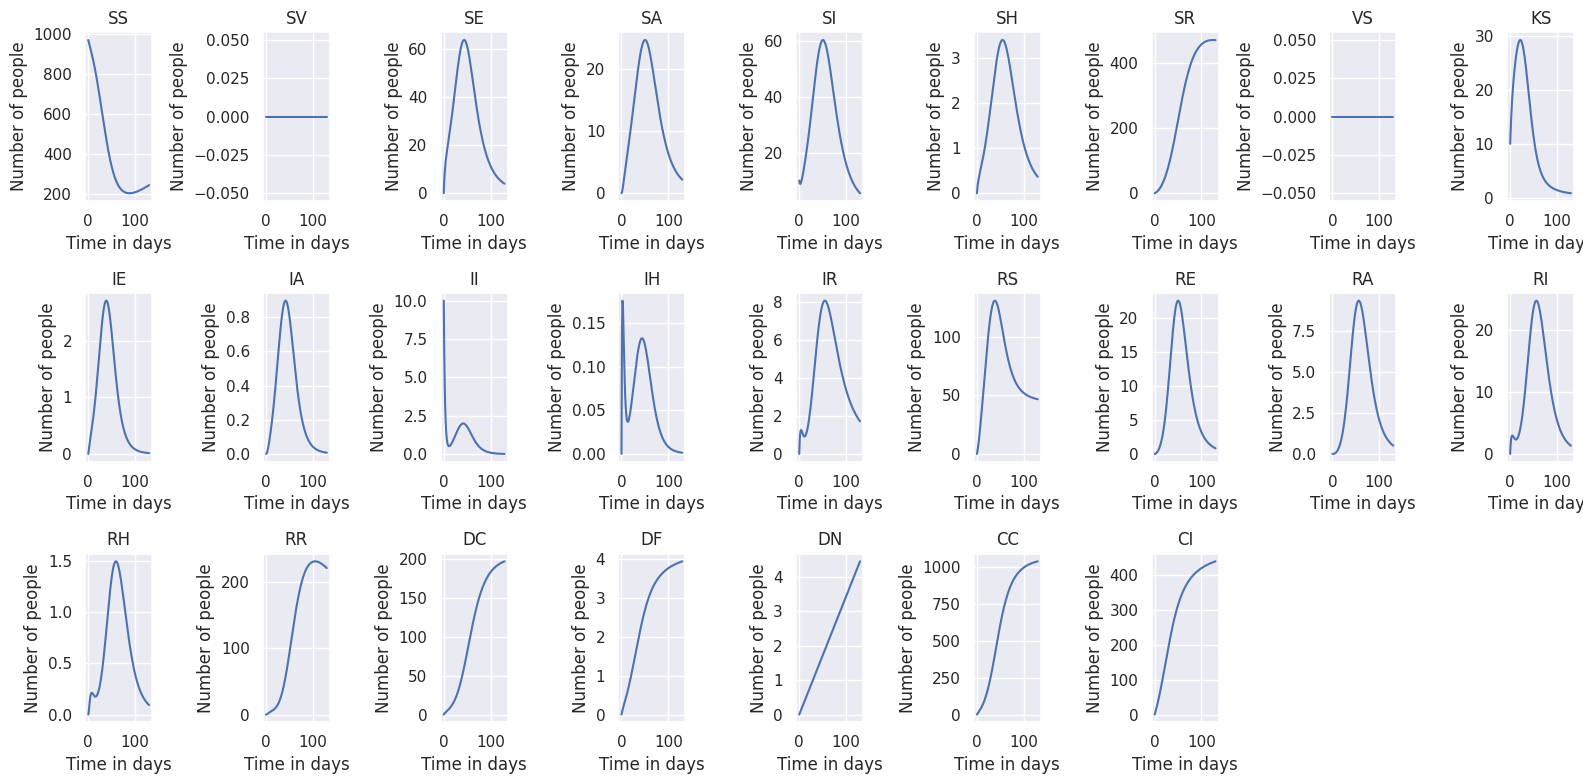

In [50]:


# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []

while t <= t_end:
    times.append(t)
    results.append(y0)

    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]

results = np.array(results)

# Create a multicolumn figure
fig, axes = plt.subplots(3, 9, figsize=(16, 8))
axes = axes.flatten()
variables = ['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'KS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN','CC', 'CI']

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.plot(times, results[:, i])
    ax.set_xlabel('Time in days')
    ax.set_ylabel('Number of people')
    ax.set_title(variable)

# Hide empty subplots
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.savefig('multicolumn_fig.png')
# plt.show()


In [51]:
# Printing the numerical result.
from tabulate import tabulate
v_c= 0.007
ec= 0.95
wc =1/180
v_f= 0.6*0.007
ef =0.632
wf =1/180
# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    times.append(t)
    results.append(y0)
    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Headers for the table
headers = ["Time (days)", "SS", "SV", "SE", "SA", "SI", "SH", "SR", "VS", "IS", "IE", "IA", "II", "IH", "IR", "RS", "RE", "RA", "RI", "RH", "RR", "DC", "DF", "DN", "Cum_cov", "Cum_Inf", "Total"]

# Combine time and results into a list of lists, and calculate the row sums
data = []
for t, result in zip(times, results):
    row_sum = np.sum(result[0:20])
    data.append([t] + list(result) + [row_sum])

# Print the table
table = tabulate(data, headers, tablefmt="pretty")
print(table)


+-----+--------------------+-----+--------------------+--------------------+--------------------+---------------------+--------------------+-----+--------------------+----------------------+-----------------------+----------------------+-----------------------+--------------------+--------------------+----------------------+------------------------+--------------------+----------------------+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+---------------------+--------------------+
|     |    Time (days)     | SS  |         SV         |         SE         |         SA         |         SI          |         SH         | SR  |         VS         |          IS          |          IE           |          IA          |          II           |         IH         |         IR         |          RS          |           RE           |         RA         |          RI          |         RH         |         RR      

In [52]:
# # This code will print the time in days, the compartment valuesbut not in table.
# # Initialize time and initial conditions
# t = 0
# t_end = 730
# y0 =[970, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 10, 0, 0,0, 0, 0, 0, 0, 0, 0, 0,0]

# # Print headers
# print("Time (days), SS, SV, SE, SA, SI, SH, SR, VS, KS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF")

# # Integration loop with a fixed time step of 1 day
# while t <= t_end:
#     print(f"{t}, {', '.join(map(str, y0))}")
#     sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
#                                     etaA, etaH, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
#     t = t + 1
#     y0 = sol.y[:, -1]


In [53]:
# # This prints the numerical solution without table. This is kept just for book keeping.
# # Initialize time and initial conditions
# t = 0
# t_end = 365
# y0 = [970, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# # Print headers
# print("Time (days), SS, SV, SE, SA, SI, SH, SR, VS, KS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF, Total")

# # Integration loop with a fixed time step of 1 day
# while t <= t_end:
#     compartment_values = y0
#     total_people = sum(compartment_values)
#     print(f"{t}, {', '.join(map(str, compartment_values))}, {total_people}")
#     sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
#                                     etaA, etaH, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
#     t = t + 1
#     y0 = sol.y[:, -1]


## Plotting different graphs of cumulative infections for different values of u1,u2 and u3 (u_2=u_3)

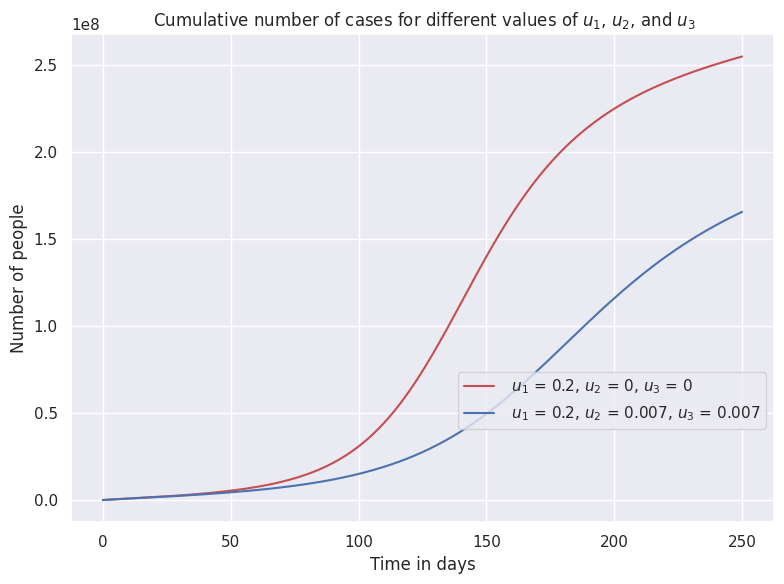

In [54]:
# Scratch
# Three fold optimization
# Plotting different graphs of cumulative infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19)
# u3 takes values from u_2 values... (if want different see coming cell codes)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:

wc = 1/180
ec = 0.95


wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:

u3 = 1
u4 = 1
u5 = 1
u1_values = [ 0.2]
u2_values = [0, 0.007]
# u3 takes values from u_2 values... (if want different see coming cell codes)

# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values

# Loop for u_3 values also.
for u3 in u2_values:
    for u2 in u2_values:
        if u2 == u3:
            # Reset time and initial conditions for each u2
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[23])
                sum2 = np.sum(y0[24])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]
        else:
            continue

        # Append the results for the current u2
        results.append(np.array(current_results))
        sum_compartments1.append(np.array(current_sum1))
        sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Loop over u1 values

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u2_values):
            if u2 == u3:
                # Reset time and initial conditions for each combination of u1, u2, u3
                t = 0
                y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
                current_results = []
                current_sum1 = []
                current_sum2 = []

                # Reset times list before the inner loop
                times = []

                while t <= t_end:
                    times.append(t)
                    current_results.append(y0)

                    # Calculate sums
                    sum1 = y0[23]
                    sum2 =  y0[24]
                    current_sum1.append(sum1)
                    current_sum2.append(sum2)

                    sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                    t = t + 1
                    y0 = sol.y[:, -1]
            else:
                continue

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * len(u2_values) + j]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum1, label=f' $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-', color=color)
            #ax.plot(times, current_sum2, label=f' $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_1$, $u_2$, and $u_3$')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(1.0 , 0.25), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
# plt.savefig('fig_Cum_dynamics_u1u2u3_finalmodel.png')

# Display the figure
plt.show()



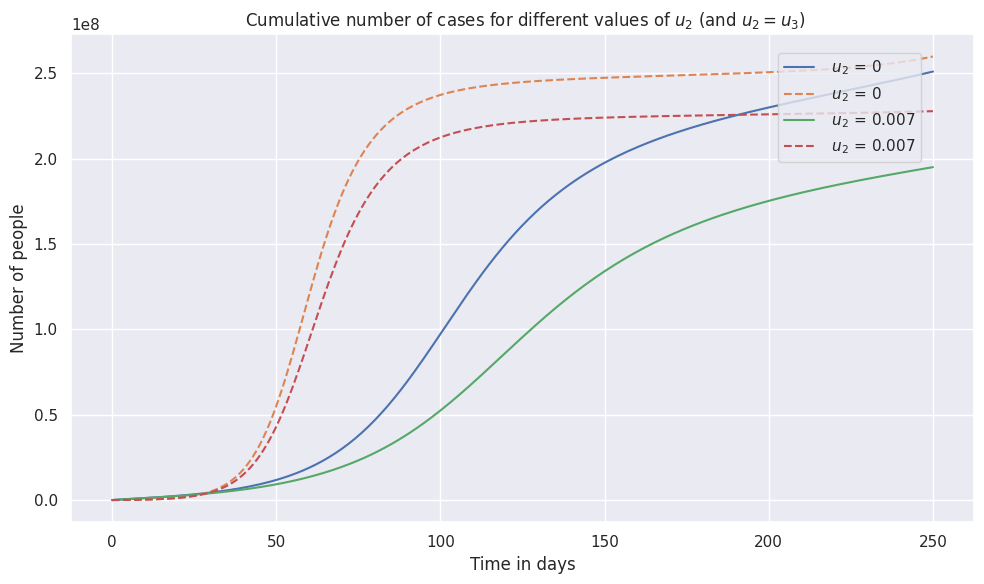

In [55]:
# Three fold optimization. Here u3 has same values as u2.
# Plotting different graphs of cumulative infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vc = 1
vf=1
t_end =250
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u2_values = [0, 0.007]
# Loop for u_3 values also.
for u3 in u2_values:
    for u2 in u2_values:
        if u2 == u3:
            # Reset time and initial conditions for each u2
            t = 0
            y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = y0[23]
                sum2 =  y0[24]
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]
        else:
            continue

        # Append the results for the current u2
        results.append(np.array(current_results))
        sum_compartments1.append(np.array(current_sum1))
        sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f' $u_2$ = {u2}')
    ax.plot(times, sum_compartments2[i, :], label=f' $u_2$ = {u2}', linestyle='--')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title(' Cumulative number of cases for different values of $u_2$ (and $u_2=u_3)$')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.85), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
# plt.savefig('fig_Cum_dynamics_u2u3_finalmodel.png')

# Display the figure
plt.show()




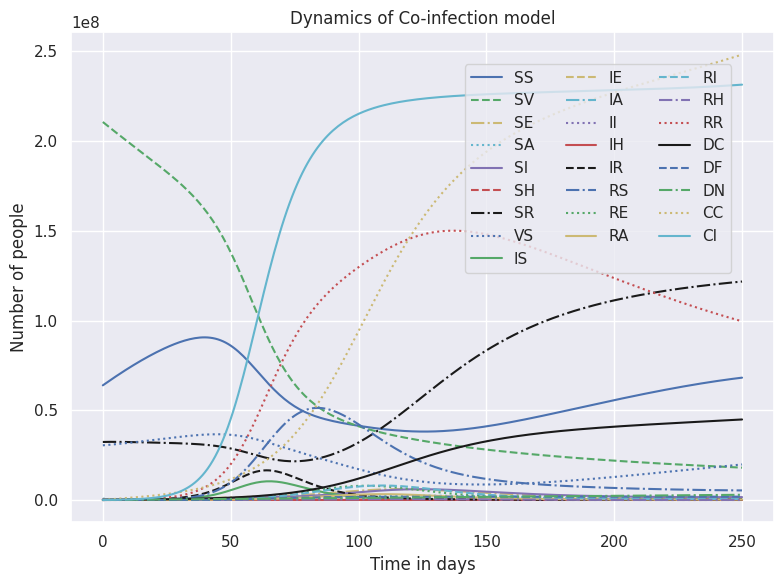

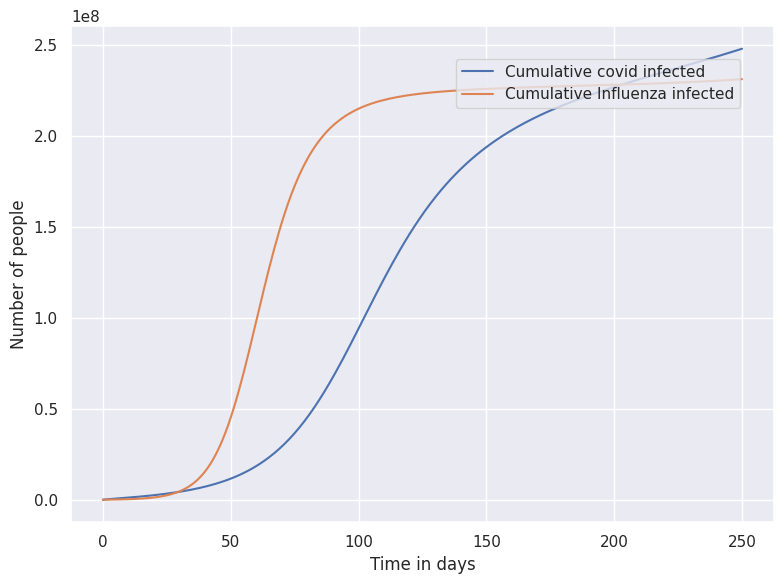

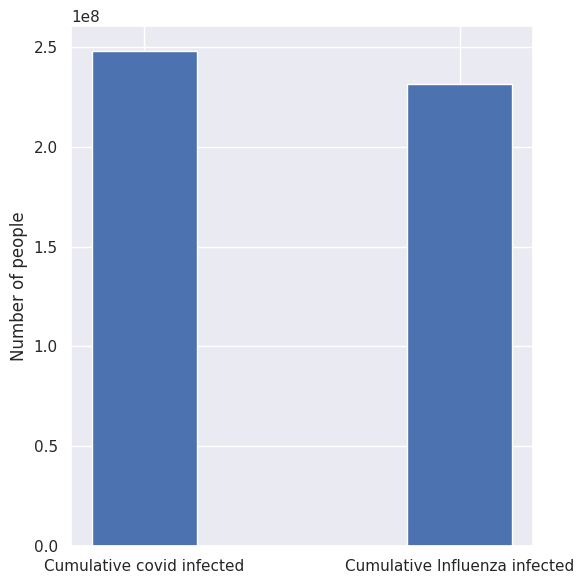

In [56]:
# This is co-infection model where vaccination is only given to susceptibles ....

import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def modelv1(t, y, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
           etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N):
    ss, sv, se, sa, si, sh, sr, vs, ks, ie, ia, ii, ih, ir, rs, re, ra, ri, rh, rr, DFC, DC, DN, CC,CI = y
    # if t < 365:
    #   thetac = 0
    #   thetaf = 0
    # #     vc = 0
    # #     vf = 0
    # #     wc = 0
    # #     wf = 0
    # #     ec = 0
    # #     ef = 0
    # #     thetac=0
    IC= etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh
    IF =ks + ie + ia + ii + etaH * ih + ir
    Lambda = mu * (ss+ sv+ se+ sa+ si+ sh +sr+ vs+ ks+ ie+ ia+ ii+ ih+ ir+ rs+ re+ ra+ ri+ rh+ rr) + muc*(si + kappa2* sh +ia + kappa1*ii + kappa2*ih +ri + kappa2*rh) + muf*(ks + ie + ia + kappa1* ii+ kappa2* ih + ir)
    dSS_dt = Lambda + thetac * (sr+rr) + thetaf * rs +wc *sv + wf* vs - u2* vc * ss - u3* vf* ss - (1-u1)*betaf * IF * ss / N - (1-u1)*betac * IC * ss / N - mu * ss
    dSV_dt = u2* vc *ss  - (wc + (1 - u4*ec) * (1-u1)*betac * IC / N + mu + (1-u1)*betaf * IF / N) * sv
    dSE_dt = (1 - u4*ec) * (1-u1)*betac * IC * sv / N + (1-u1)*betac * IC * ss / N  - deltac * se - (1-u1)*betaf * IF * se / N - mu * se
    dSA_dt = (1 - alpha) * deltac * se - gammacA * sa - (1-u1)*betaf * IF * sa / N - mu* sa
    dSI_dt = alpha * deltac * se - (1-u1)*betaf * IF * si / N - (q*hc + (1-q)* u5* gammacI + mu + muc) * si
    dSH_dt = q*hc * si - (1-u1)*betaf * IF * sh / N - (mu + kappa2 * muc + u5* gammacH) * sh
    dSR_dt = gammacA * sa + thetaf * rr + (1-q)* u5* gammacI * si + u5* gammacH* sh - (1-u1)*betaf * IF * sr / N - thetac * sr - mu * sr
    dVS_dt = u3* vf* ss - (wf + (1 - u4*ef) * (1-u1)*betaf * IF / N + mu + (1-u1)*betac * IC / N) * vs
    dKS_dt = (1 - u4*ef) * (1-u1)*betaf * IF * vs / N + (1-u1)*betaf * IF * ss / N - (1-u1)*betac * IC * ks / N - gammaf * ks - mu * ks -muf *ks
    dIE_dt = (1-u1)*betac * IC * ks / N + (1-u1)*betaf * IF * se / N - (deltac + gammaf) * ie - mu * ie -muf *ie
    dIA_dt = (1 - alpha) * deltac * ie + (1-u1)*betaf * IF * sa / N - gammacA * ia - gammaf * ia - (mu + muc + muf ) *ia
    dII_dt = alpha * deltac * ie + (1-u1)*betaf * IF * si / N - (q*hfc + (1-q)* u5* gammacI) * ii - gammaf * ii - mu *ii - kappa1*(muc+ muf ) * ii
    dIH_dt = q*hfc * ii + (1-u1)*betaf * IF * sh / N - (u5* gammacH+ gammaf + mu + kappa2 *(muc+ muf)) * ih
    dIR_dt = gammacA * ia + (1-q)* u5* gammacI * ii + u5* gammacH* ih + (1-u1)*betaf * IF * (sr + sv) / N - (gammaf + mu +muf) * ir
    dRS_dt = gammaf * ks - (1-u1)*betac * IC * rs / N - thetaf * rs - mu * rs
    dRE_dt = (1-u1)*betac * IC * (rs + vs) / N + gammaf * ie - deltac * re - mu * re
    dRA_dt = (1 - alpha) * deltac * re + phi * gammaf * ia - gammacA * ra - mu* ra
    dRI_dt = alpha * deltac * re + (1 - phi) * gammaf * ia + gammaf * ii - ((1-q)* u5* gammacI + q*hc + mu + muc) * ri
    dRH_dt = q*hc * ri + gammaf * ih - (u5* gammacH+ mu + kappa2 * muc) * rh
    dRR_dt = gammacA * ra + (1-q)* u5* gammacI *ri + u5* gammacH* rh + gammaf * ir - (thetac + thetaf + mu) * rr
    dDC_dt = muc*(si + kappa2* sh +ia + kappa1*ii + kappa2*ih +ri + kappa2*rh)
    dDF_dt = muf*(ks + ie + ia + kappa1* ii+ kappa2* ih + ir)
    dDN_dt = mu * (ss+ sv+ se+ sa+ si+ sh +sr+ vs+ ks+ ie+ ia+ ii+ ih+ ir+ rs+ re+ ra+ ri+ rh+ rr)
    dCC_dt= (1 - u4*ec) * (1-u1)*betac * IC * sv / N + (1-u1)*betac * IC * ss / N + (1-u1)*betac * IC * ks/N + (1-u1)*betac * IC * (rs + vs) / N
    dCI_dt= (1 - u4*ef) * (1-u1)*betaf * IF * vs / N + (1-u1)*betaf * IF * ss / N + (1-u1)*betaf * IF * se / N + (1-u1)*betaf * IF *( sa +si +sh +sr + sv ) / N
    return [dSS_dt, dSV_dt, dSE_dt, dSA_dt, dSI_dt, dSH_dt, dSR_dt, dVS_dt, dKS_dt, dIE_dt, dIA_dt, dII_dt, dIH_dt, dIR_dt, dRS_dt, dRE_dt, dRA_dt, dRI_dt, dRH_dt, dRR_dt, dDC_dt, dDF_dt, dDN_dt, dCC_dt, dCI_dt]

# Parameter values:
N = 338417798  #334805269

thetac = 1 / 365
thetaf = 1 / 365
betac = 0.5402
alpha = 0.7
deltac = 1/5
gammacA = 1/7
gammacI = 1/10
gammacH = 1/9
hc = 1/4
hfc = 1/3
betaf = 0.3530
gammaf = 1/5
phi = 0.5
kappa1 = 3
kappa2 = 6
etaA = 0.7228
etaH = 0.6526
q=0.0624

# Death rates:
mu = 1/(80*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.0007
wc = 1/180
ec = 0.95

vf =  0.005
wf = 1/180
ef = 0.632

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1


# Initialize time and initial conditions
t = 0
t_end =250
# y0 = [208092945, 267844215, 10482, 758346, 35705, 2228, 108065982,
#       160706529, 100000, 5000, 2000, 4000, 1000, 20000,
#       20000, 100, 100, 100, 10, 10,
#       0, 0, 0, 0, 0]
y0 = [63880175, 210620160, 14783, 743679, 318719, 17800, 32324482,
          30456000, 20000, 5000, 7000, 5000, 4000, 1000,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
# Lists to store the results at each time step
times = []
results = []
cumulative_covid_coinfectionmodel=[]
cumulative_Influenza_coinfectionmodel=[]
# Integration loop with a fixed time step of 1 day

sum1 = y0[2:6] + y0[9:13] + y0[15:19]  # Initialize cumulative_covid_coinfectionmodel sum
sum2 = y0[8:14]  # Initialize cumulative_Influenza_coinfectionmodel sum

while t <= t_end:
    times.append(t)
    results.append(y0)

    sum1 = np.sum(y0[23])
    sum2 = np.sum(y0[24])

    cumulative_covid_coinfectionmodel.append(sum1)
    cumulative_Influenza_coinfectionmodel.append(sum2)

    sol = solve_ivp(modelv1, [t, t + 1], y0, args=( betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]


# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# ax.set_xlim(0, 250) # Remove this two lines if you want complete  diagram
# ax.set_ylim(0,700)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of Co-infection model')
# Adjust legend position and size
legend = ax.legend(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR',
                    'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN','CC','CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=3)

plt.tight_layout()

plt.savefig('fig_coinfnV_final.png')
# plt.show()
#################

#########################################################
### Plot only the Cumulative covid infected and Influenza
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(times,cumulative_covid_coinfectionmodel, label='Cumulative covid infected')
ax.plot(times,cumulative_Influenza_coinfectionmodel, label='Cumulative Influenza infected')
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=1)
plt.tight_layout()

################### Bar diagram

# Final values of Cumulative COVID and Influenza infections
final_covid = cumulative_covid_coinfectionmodel[-1]
final_influenza = cumulative_Influenza_coinfectionmodel[-1]

# Create a bar diagram for the final values
fig, ax = plt.subplots(figsize=(6, 6))
# Set your desired bar width
bar_width = 0.1

# Custom bar positions
bar_positions = [0.25, 0.55]  # Adjust these values to change the bar positions

# Bar heights
bar_heights = [final_covid, final_influenza]

# Create bars
ax.bar(bar_positions, bar_heights, width=bar_width)

# Set custom tick positions and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Cumulative covid infected', 'Cumulative Influenza infected'])

ax.set_ylabel('Number of people')

plt.tight_layout()
plt.show()

